# Forecast GDP growth of regions in Finland

Data source: Statistic Finland

Table: 12bc -- Gross domestic product per capita by area, annually, 2000-2020

Link: https://pxdata.stat.fi/PxWeb/pxweb/en/StatFin/StatFin__altp/statfin_altp_pxt_12bc.px/table/tableViewLayout1/

In [4]:
import pandas as pd
import numpy as np

## Processing raw data

In [5]:
# Create the base with region column DataFrame
base_df = pd.read_csv('../data/Indices/population_density_index.csv')
base_df = base_df[['Region code', 'Region name (en)', 'Region name (fi)']].copy()
base_df.drop_duplicates(inplace=True)
base_df.reset_index(drop=True, inplace=True)

base_df

Region code      Region name (en)   Region name (fi)
0         MK01               Uusimaa            Uusimaa
1         MK02     Southwest Finland    Varsinais-Suomi
2         MK04             Satakunta          Satakunta
3         MK05            Kanta-Häme         Kanta-Häme
4         MK06             Pirkanmaa          Pirkanmaa
5         MK07           Päijät-Häme        Päijät-Häme
6         MK08           Kymenlaakso        Kymenlaakso
7         MK09         South Karelia      Etelä-Karjala
8         MK10            South Savo         Etelä-Savo
9         MK11            North Savo       Pohjois-Savo
10        MK12         North Karelia    Pohjois-Karjala
11        MK13       Central Finland        Keski-Suomi
12        MK14    South Ostrobothnia    Etelä-Pohjanmaa
13        MK15          Ostrobothnia          Pohjanmaa
14        MK16  Central Ostrobothnia    Keski-Pohjanmaa
15        MK17    North Ostrobothnia  Pohjois-Pohjanmaa
16        MK18                Kainuu             Kainuu
17        MK19               Lapland              Lappi
18        MK21                 Åland         Ahvenanmaa

In [6]:
import requests
import json

# Define the URL and JSON query
url = "https://pxdata.stat.fi:443/PxWeb/api/v1/en/StatFin/altp/statfin_altp_pxt_12bc.px"
query = {
  "query": [
    {
      "code": "Alue",
      "selection": {
        "filter": "item",
        "values": [
          "MK01",
          "MK02",
          "MK04",
          "MK05",
          "MK06",
          "MK07",
          "MK08",
          "MK09",
          "MK10",
          "MK11",
          "MK12",
          "MK13",
          "MK14",
          "MK15",
          "MK16",
          "MK17",
          "MK18",
          "MK19",
          "MK21"
        ]
      }
    },
    {
      "code": "Tiedot",
      "selection": {
        "filter": "item",
        "values": [
          "GDPcap",
          "EP"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

# Send the POST request
response = requests.post(url, json=query)

# Check the response status and content
if response.status_code == 200:
    json_data = response.json()
else:
    print("Request failed with status code:", response.status_code)

json_data

{'class': 'dataset',
 'label': 'Gross domestic product per capita by area, annually by Area, Year and Information',
 'source': 'Statistics Finland, regional account',
 'updated': '2022-12-01T06:00:00Z',
 'id': ['Alue', 'Vuosi', 'Tiedot'],
 'size': [19, 21, 2],
 'dimension': {'Alue': {'extension': {'show': 'value'},
   'label': 'Area',
   'category': {'index': {'MK01': 0,
     'MK02': 1,
     'MK04': 2,
     'MK05': 3,
     'MK06': 4,
     'MK07': 5,
     'MK08': 6,
     'MK09': 7,
     'MK10': 8,
     'MK11': 9,
     'MK12': 10,
     'MK13': 11,
     'MK14': 12,
     'MK15': 13,
     'MK16': 14,
     'MK17': 15,
     'MK18': 16,
     'MK19': 17,
     'MK21': 18},
    'label': {'MK01': 'MK01 Uusimaa',
     'MK02': 'MK02 Southwest Finland',
     'MK04': 'MK04 Satakunta',
     'MK05': 'MK05 Kanta-Häme',
     'MK06': 'MK06 Pirkanmaa',
     'MK07': 'MK07 Päijät-Häme',
     'MK08': 'MK08 Kymenlaakso',
     'MK09': 'MK09 South Karelia',
     'MK10': 'MK10 South Savo',
     'MK11': 'MK11 North

In [7]:
# save json_data to file
with open('../data/forecast_values/gdp_region_index.json', 'w') as outfile:
    json.dump(json_data, outfile)

In [8]:
values = json_data['value']
shape = json_data['size']

json_year = json_data['dimension']['Vuosi']['category']['label'].values()
json_region = json_data['dimension']['Alue']['category']['label'].values()
json_education = json_data['dimension']['Tiedot']['category']['label'].values()
print(json_year)
print(json_region)
print(json_education)
print(len(json_year))
print(len(json_region))
print(len(json_education))
print(shape)

# Load values into a 1D NumPy array
values = np.array(values).reshape(shape).squeeze()
# reshape = np.reshape(values, (19,12,6))
# print(reshape.shape)
# reshape
print(values.shape)
values

dict_values(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])
dict_values(['MK01 Uusimaa', 'MK02 Southwest Finland', 'MK04 Satakunta', 'MK05 Kanta-Häme', 'MK06 Pirkanmaa', 'MK07 Päijät-Häme', 'MK08 Kymenlaakso', 'MK09 South Karelia', 'MK10 South Savo', 'MK11 North Savo', 'MK12 North Karelia', 'MK13 Central Finland', 'MK14 South Ostrobothnia', 'MK15 Ostrobothnia', 'MK16 Central Ostrobothnia', 'MK17 North Ostrobothnia', 'MK18 Kainuu', 'MK19 Lapland', 'MK21 Åland'])
dict_values(['At current prices, euro', 'Population'])
21
19
2
[19, 21, 2]
(19, 21, 2)


array([[[  36287.2, 1386956. ],
        [  38464.1, 1401362. ],
        [  38568.2, 1414232. ],
        [  38655.3, 1424904. ],
        [  40319.7, 1434635. ],
        [  41712.6, 1445742. ],
        [  43998. , 1459768. ],
        [  47360.4, 1475586. ],
        [  48914.3, 1492615. ],
        [  46623.7, 1509612. ],
        [  47905.8, 1524926. ],
        [  48634.8, 1540684. ],
        [  48585.2, 1557947. ],
        [  49810.3, 1576154. ],
        [  49621.6, 1594431. ],
        [  51175.2, 1611825. ],
        [  52146.9, 1629277. ],
        [  53659.9, 1646959. ],
        [  55083.8, 1663324. ],
        [  56807.8, 1680375. ],
        [  55537.6, 1696202. ]],

       [[  26103.1,  446323. ],
        [  26552.6,  448198. ],
        [  29577.2,  450131. ],
        [  29070.5,  451706. ],
        [  30629. ,  453095. ],
        [  31346.9,  454665. ],
        [  32930.7,  456687. ],
        [  36025.9,  458512. ],
        [  36531.2,  460206. ],
        [  33381.4,  462046. ],
      

In [9]:
# Create the nested index
tuples = []
for region in json_region:
    for year in json_year:
        tuples.append((region, year))

index = pd.MultiIndex.from_tuples(tuples, names=["Region", "Year"])

# Create a NumPy array from the value list
value_array = np.array(json_data['value'])
shape = json_data['size']

transformed_array = np.array(value_array).reshape(shape).squeeze()
# reshape from (5, 19, 12, 4) to (5*19*12, 4)
transformed_array = transformed_array.reshape(-1, len(json_education))

# Create a DataFrame from the value list with the nested index
df = pd.DataFrame(data=transformed_array, index=index, columns=json_education)

# Rename the columns
df.reset_index(inplace=True)
df['Region code'] = df['Region'].str[:4]
df.rename(columns={'At current prices, euro': 'GDP per capita (EUR)'}, inplace=True)

df['GDP (EUR)'] = df['GDP per capita (EUR)'] * df['Population']
# Print the DataFrame
df

Region  Year  GDP per capita (EUR)  Population Region code  \
0    MK01 Uusimaa  2000               36287.2   1386956.0        MK01   
1    MK01 Uusimaa  2001               38464.1   1401362.0        MK01   
2    MK01 Uusimaa  2002               38568.2   1414232.0        MK01   
3    MK01 Uusimaa  2003               38655.3   1424904.0        MK01   
4    MK01 Uusimaa  2004               40319.7   1434635.0        MK01   
..            ...   ...                   ...         ...         ...   
394    MK21 Åland  2016               47022.3     29099.0        MK21   
395    MK21 Åland  2017               47500.4     29352.0        MK21   
396    MK21 Åland  2018               43976.8     29639.0        MK21   
397    MK21 Åland  2019               45606.3     29837.0        MK21   
398    MK21 Åland  2020               40050.0     30007.0        MK21   

        GDP (EUR)  
0    5.032875e+10  
1    5.390213e+10  
2    5.454438e+10  
3    5.508009e+10  
4    5.784405e+10  
..            ...  
394  1.368302e+09  
395  1.394232e+09  
396  1.303428e+09  
397  1.360755e+09  
398  1.201780e+09  

[399 rows x 6 columns]

In [10]:
DATA = df.copy()
DATA

Region  Year  GDP per capita (EUR)  Population Region code  \
0    MK01 Uusimaa  2000               36287.2   1386956.0        MK01   
1    MK01 Uusimaa  2001               38464.1   1401362.0        MK01   
2    MK01 Uusimaa  2002               38568.2   1414232.0        MK01   
3    MK01 Uusimaa  2003               38655.3   1424904.0        MK01   
4    MK01 Uusimaa  2004               40319.7   1434635.0        MK01   
..            ...   ...                   ...         ...         ...   
394    MK21 Åland  2016               47022.3     29099.0        MK21   
395    MK21 Åland  2017               47500.4     29352.0        MK21   
396    MK21 Åland  2018               43976.8     29639.0        MK21   
397    MK21 Åland  2019               45606.3     29837.0        MK21   
398    MK21 Åland  2020               40050.0     30007.0        MK21   

        GDP (EUR)  
0    5.032875e+10  
1    5.390213e+10  
2    5.454438e+10  
3    5.508009e+10  
4    5.784405e+10  
..            ...  
394  1.368302e+09  
395  1.394232e+09  
396  1.303428e+09  
397  1.360755e+09  
398  1.201780e+09  

[399 rows x 6 columns]

## Visualizing for all regions

In [13]:
# functions to get dataframes for each region
def get_region_gdp_per_capita(region_code, df):
    """Return dataframe with region code, year, and GDP per capita."""
    df_region = df[df['Region code'] == region_code].copy()
    df_region.drop(columns=['Region', 'Region code', 'Population', 'GDP (EUR)'], inplace=True)
    df_region.set_index('Year', inplace=True)
    return df_region

def get_region_gdp(region_code, df):
    """Return dataframe with region code, year, and GDP."""
    df_region = df[df['Region code'] == region_code].copy()
    df_region.drop(columns=['Region', 'Region code', 'Population', 'GDP per capita (EUR)'], inplace=True)
    df_region.set_index('Year', inplace=True)
    return df_region

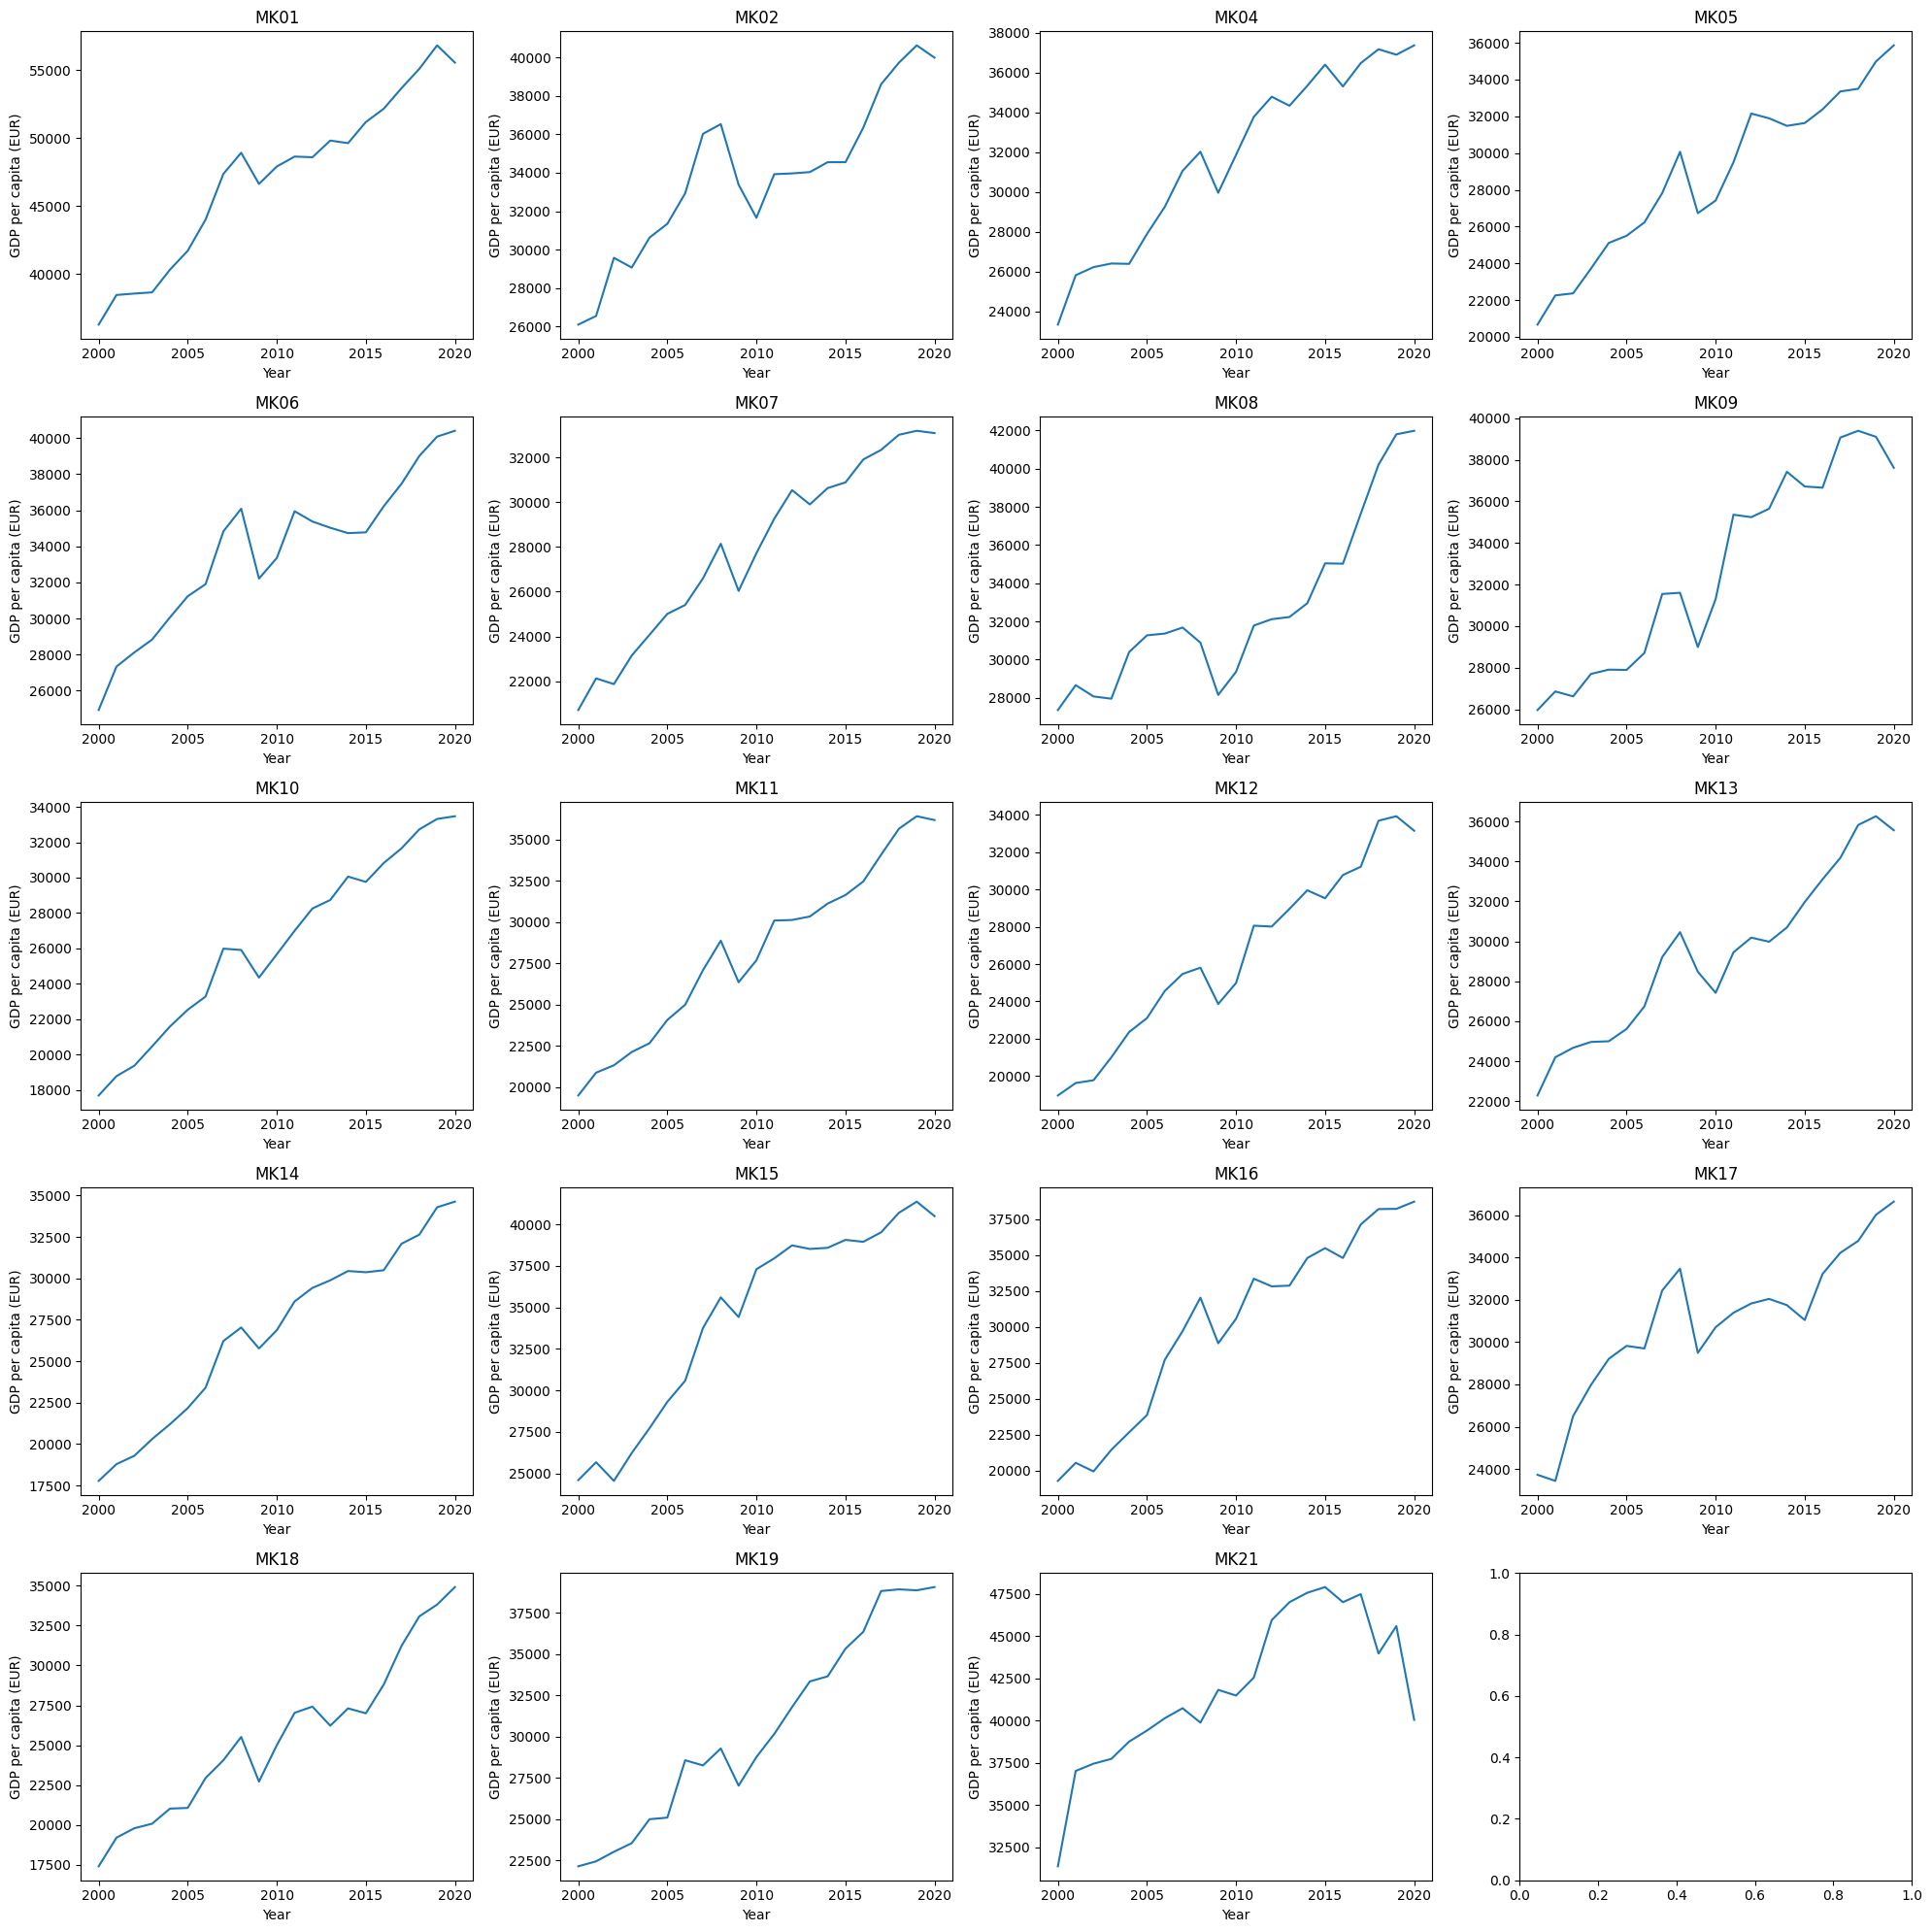

In [14]:
# Plot for GDP per capita in all regions
# create a plot with 19 subplots into 5 row 4 column for all regions
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()
for i, region in enumerate(df['Region code'].unique()):
    df_region = get_region_gdp_per_capita(region, df)
    df_region.plot(ax=axes[i], legend=False)
    axes[i].set_title(region)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('GDP per capita (EUR)')
plt.tight_layout()
plt.show()

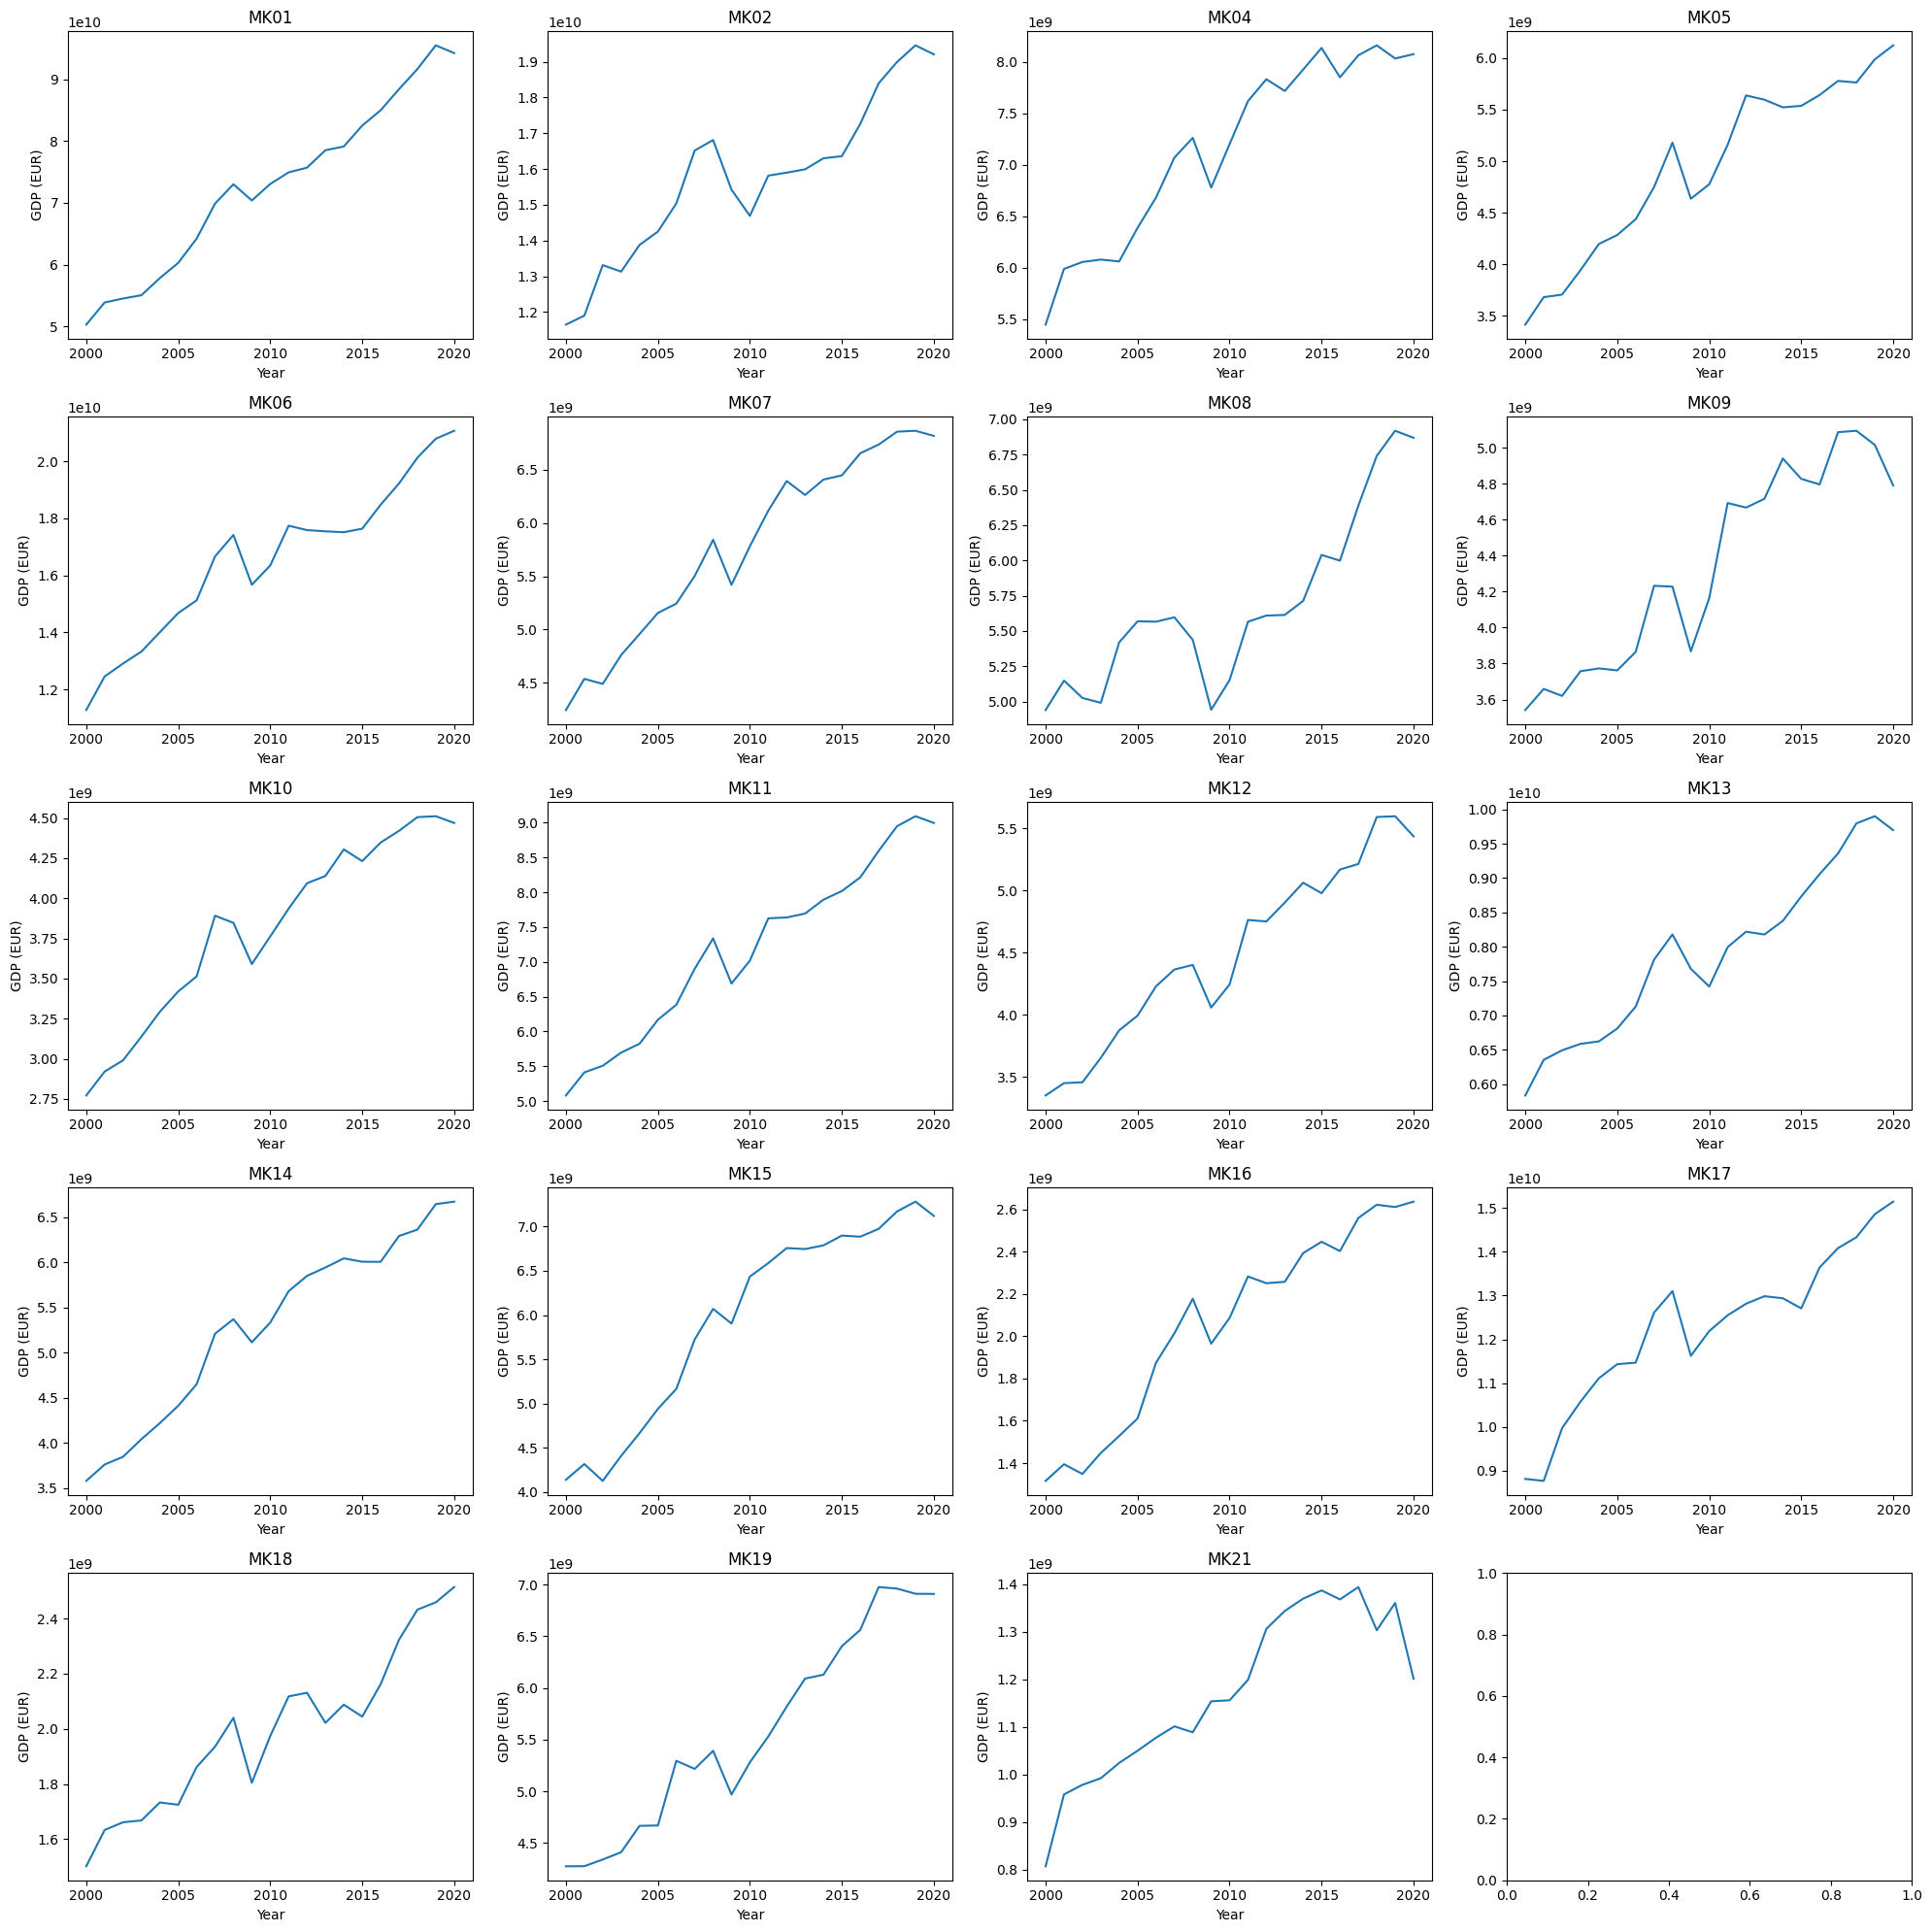

In [15]:
# Plot for GDP in all regions
# create a plot with 19 subplots into 5 row 4 column for all regions
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()
for i, region in enumerate(df['Region code'].unique()):
    df_region = get_region_gdp(region, df)
    df_region.plot(ax=axes[i], legend=False)
    axes[i].set_title(region)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('GDP (EUR)')
plt.tight_layout()
plt.show()

In [74]:
get_region_gdp_per_capita('MK01', df)

GDP per capita (EUR)
Year                      
2000               36287.2
2001               38464.1
2002               38568.2
2003               38655.3
2004               40319.7
2005               41712.6
2006               43998.0
2007               47360.4
2008               48914.3
2009               46623.7
2010               47905.8
2011               48634.8
2012               48585.2
2013               49810.3
2014               49621.6
2015               51175.2
2016               52146.9
2017               53659.9
2018               55083.8
2019               56807.8
2020               55537.6

<Axes: xlabel='Year'>

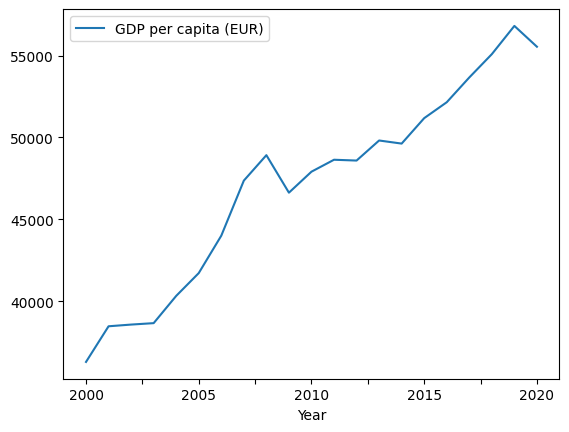

In [101]:
# plot gdp per capita for region MK01
mk01 = get_region_gdp_per_capita('MK01', df)
# mk01.index = mk01.index.astype(int)
mk01.plot()

## Forecasting

### Linear Model -> Not capture some small patterns

In [92]:
# Create a LinearRegression model and fit it to the data and forecast for next 3 years
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(mk01.index.values.reshape(-1, 1), mk01['GDP per capita (EUR)'])

# Forecast for next 3 years
# Create a NumPy array with the years 2020-2022
# years = np.concatenate(np.array(mk01.index), np.array([2020, 2021, 2022])).reshape(-1, 1)
years = np.arange(2000, 2024).reshape(-1, 1)

# Predict the GDP per capita for the years 2020-2022
predictions = model.predict(years)

# Create a DataFrame with the years 2020-2022 and the predictions
predictions_df = pd.DataFrame({'Year': years.squeeze(), 'GDP per capita (EUR)': predictions})
predictions_df.set_index('Year', inplace=True)
predictions_df

GDP per capita (EUR)
Year                      
2000          37471.488745
2001          38438.017965
2002          39404.547186
2003          40371.076407
2004          41337.605628
2005          42304.134848
2006          43270.664069
2007          44237.193290
2008          45203.722511
2009          46170.251732
2010          47136.780952
2011          48103.310173
2012          49069.839394
2013          50036.368615
2014          51002.897835
2015          51969.427056
2016          52935.956277
2017          53902.485498
2018          54869.014719
2019          55835.543939
2020          56802.073160
2021          57768.602381
2022          58735.131602
2023          59701.660823

In [95]:
final_df = pd.concat([mk01, predictions_df], axis=1)    
final_df

GDP per capita (EUR)  GDP per capita (EUR)
Year                                            
2000               36287.2          37471.488745
2001               38464.1          38438.017965
2002               38568.2          39404.547186
2003               38655.3          40371.076407
2004               40319.7          41337.605628
2005               41712.6          42304.134848
2006               43998.0          43270.664069
2007               47360.4          44237.193290
2008               48914.3          45203.722511
2009               46623.7          46170.251732
2010               47905.8          47136.780952
2011               48634.8          48103.310173
2012               48585.2          49069.839394
2013               49810.3          50036.368615
2014               49621.6          51002.897835
2015               51175.2          51969.427056
2016               52146.9          52935.956277
2017               53659.9          53902.485498
2018               55083.8          54869.014719
2019               56807.8          55835.543939
2020               55537.6          56802.073160
2021                   NaN          57768.602381
2022                   NaN          58735.131602
2023                   NaN          59701.660823

In [97]:
def mae(y_true, y_pred):
    """Return the mean absolute error of the prediction."""
    return np.mean(np.abs(y_true - y_pred))

# Calculate the mean absolute error of the model
mae_value = mae(mk01['GDP per capita (EUR)'], predictions_df['GDP per capita (EUR)'])
mae_value

1002.6857761286343

<Axes: xlabel='Year'>

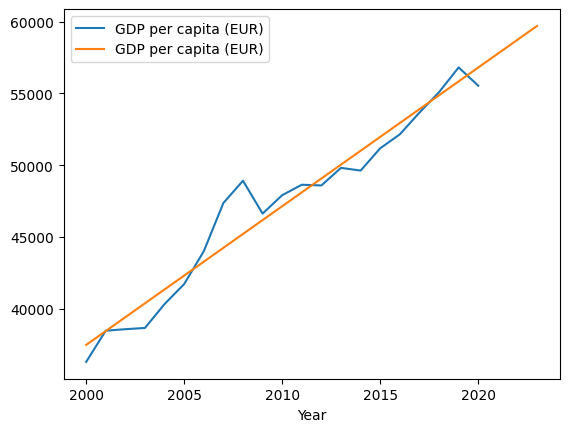

In [96]:
# plot final_df
final_df.plot()

### ARIMA model -> Too many manual model parameter configuration

In [102]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

train_len = int(len(mk01) * 0.8)

train_data, test_data = mk01[0:train_len], mk01[train_len:]

train_arima = train_data['GDP per capita (EUR)']
test_arima = test_data['GDP per capita (EUR)']


history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 1771022.7197121442
MAE: 1304.3696682254188
RMSE: 1330.7977756639602


/var/folders/jp/q6ywrx8j7z1cmy9tjn4d_zhh0000gn/T/ipykernel_49981/938475919.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(y[0])
/var/folders/jp/q6ywrx8j7z1cmy9tjn4d_zhh0000gn/T/ipykernel_49981/938475919.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = y[i]


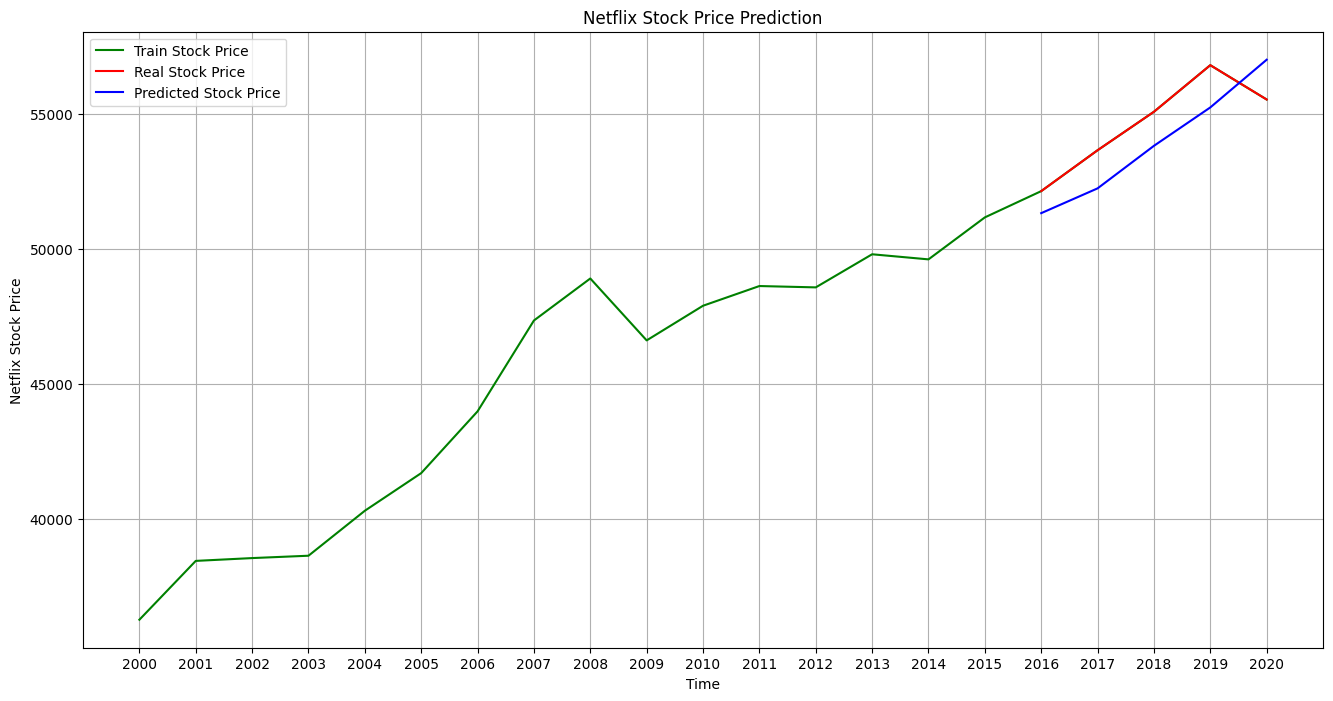

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(mk01.index[-600:], mk01['GDP per capita (EUR)'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()

### Auto ARIMA -> Chosen algorithm!

#### Experiment pieces of code

In [141]:
import pandas as pd

# Sample time series data
data = {
    'Year': list(range(2000, 2021)),
    'GDP per capita (EUR)': [
        36287.2, 38464.1, 38568.2, 38655.3, 40319.7, 41712.6, 43998.0, 47360.4, 48914.3, 46623.7,
        47905.8, 48634.8, 48585.2, 49810.3, 49621.6, 51175.2, 52146.9, 53659.9, 55083.8, 56807.8,
        55537.6
    ]
}

df = pd.DataFrame(data)
df

Year  GDP per capita (EUR)
0   2000               36287.2
1   2001               38464.1
2   2002               38568.2
3   2003               38655.3
4   2004               40319.7
5   2005               41712.6
6   2006               43998.0
7   2007               47360.4
8   2008               48914.3
9   2009               46623.7
10  2010               47905.8
11  2011               48634.8
12  2012               48585.2
13  2013               49810.3
14  2014               49621.6
15  2015               51175.2
16  2016               52146.9
17  2017               53659.9
18  2018               55083.8
19  2019               56807.8
20  2020               55537.6

In [142]:
# Split the data into a train and test set (80% train, 20% test)
train_size = 0.8
split_index = int(len(df) * train_size)

train_data = df[:split_index]
test_data = df[split_index:]


In [143]:
from pmdarima.arima import auto_arima

# Find the best ARIMA model automatically
model = auto_arima(train_data['GDP per capita (EUR)'],
                   start_p=0,
                   start_q=0,
                   max_p=5,
                   max_q=5,
                   trace=True,
                   seasonal=False,
                   stationary=False)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=261.469, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=262.594, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=262.845, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=266.433, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=264.564, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.054 seconds


In [144]:
model.fit(train_data['GDP per capita (EUR)'])

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [145]:
train_forecast = model.predict_in_sample()
test_forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)

In [146]:
from sklearn.metrics import mean_squared_error

# Calculate the training error (Root Mean Squared Error, RMSE)
train_rmse = mean_squared_error(train_data['GDP per capita (EUR)'][1:], train_forecast[1:], squared=False)

# Calculate the test error (Root Mean Squared Error, RMSE)
test_rmse = mean_squared_error(test_data['GDP per capita (EUR)'], test_forecast, squared=False)

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Training RMSE: 1291.2255432555378
Test RMSE: 920.971659112753


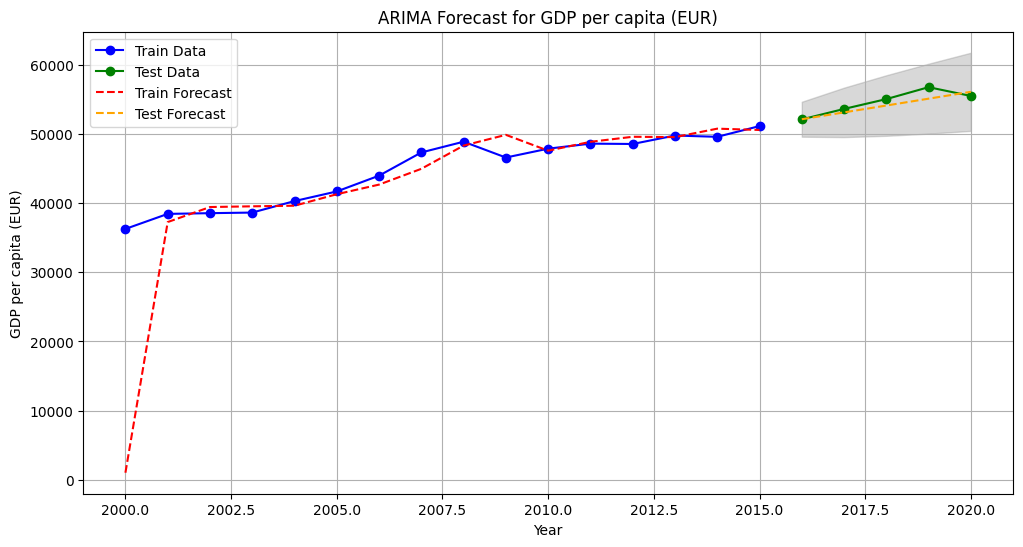

In [150]:
import matplotlib.pyplot as plt

# Plot the original training and test data
plt.figure(figsize=(12, 6))
plt.plot(train_data['Year'], train_data['GDP per capita (EUR)'], label='Train Data', marker='o', markersize=6, color='blue')
plt.plot(test_data['Year'], test_data['GDP per capita (EUR)'], label='Test Data', marker='o', markersize=6, color='green')

# Plot the training and test forecasts
plt.plot(train_data['Year'], train_forecast, label='Train Forecast', linestyle='dashed', color='red')
plt.plot(test_data['Year'], test_forecast, label='Test Forecast', linestyle='dashed', color='orange')

# Plot the confidence intervals for the forecasts
cf = pd.DataFrame(conf_int)
cf.index = test_data['Year']
plt.fill_between(cf.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

plt.title('ARIMA Forecast for GDP per capita (EUR)')
plt.xlabel('Year')
plt.ylabel('GDP per capita (EUR)')
plt.legend()
plt.grid(True)
plt.show()


#### Functionalize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error

Training MAE: 916.5252595155719
Test MAE: 898.0333333333352


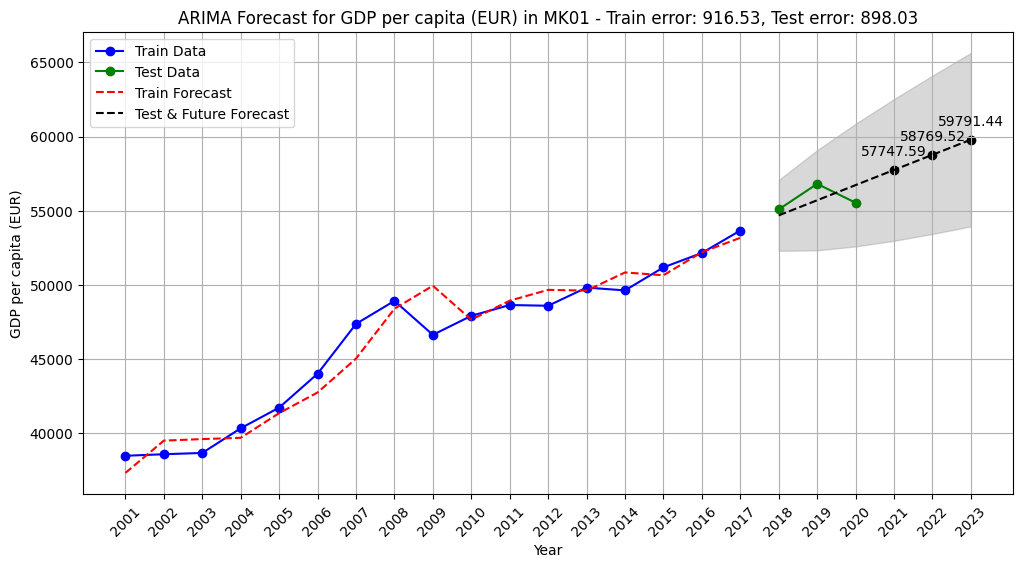

In [36]:
region = 'MK01'
df = get_region_gdp_per_capita(region_code=region, df=DATA)
df.reset_index(inplace=True)
df['Year'] = df['Year'].astype(int)

# Split the data into a train and test set 
train_size = 0.9
split_index = int(len(df) * train_size)

train_data = df[:split_index]
test_data = df[split_index:]

# Find the best ARIMA model automatically
model = auto_arima(train_data['GDP per capita (EUR)'],
                   start_p=0,
                   start_q=0,
                   max_p=5,
                   max_q=5,
                #    trace=True,
                   seasonal=False,
                   stationary=False)

model.fit(train_data['GDP per capita (EUR)'])

# Forecast for the training and test data
train_forecast = model.predict_in_sample()
test_forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)

# Calculate the training and testing error (Mean Absolute Error, MAE)
train_data = train_data[1:].copy()
train_forecast = train_forecast[1:].copy()
train_data['Forecast'] = train_forecast
train_mae = mean_absolute_error(train_data['GDP per capita (EUR)'], train_forecast)
test_mae = mean_absolute_error(test_data['GDP per capita (EUR)'], test_forecast)
print("Training MAE:", train_mae)
print("Test MAE:", test_mae)

# Forecast for the next 3 years outside the scope of data
num_years_to_forecast = 3
last_year = df['Year'].max()
forecast_years = np.arange(last_year + 1, last_year + num_years_to_forecast + 1)
forecast_df = pd.concat([test_data, pd.DataFrame({'Year': forecast_years})], ignore_index=True)
forecast, conf_int = model.predict(n_periods=len(forecast_df), return_conf_int=True)
forecast.index = range(len(forecast))
forecast_df['Forecast'] = forecast

import matplotlib.pyplot as plt

# Plot the original training and test data
plt.figure(figsize=(12, 6))
plt.plot(train_data['Year'], train_data['GDP per capita (EUR)'], label='Train Data', marker='o', markersize=6, color='blue')
plt.plot(forecast_df['Year'], forecast_df['GDP per capita (EUR)'], label='Test Data', marker='o', markersize=6, color='green')

# Plot the training and test forecasts
plt.plot(train_data['Year'], train_data['Forecast'], label='Train Forecast', linestyle='dashed', color='red')
plt.plot(forecast_df['Year'], forecast_df['Forecast'], label='Test & Future Forecast', linestyle='dashed', color='black')

# Plot the confidence intervals for the forecasts
cf = pd.DataFrame(conf_int)
cf.index = forecast_df['Year']
plt.fill_between(cf.index,
                cf[0],
                cf[1], color='grey', alpha=.3)

# Set x-ticks for every year
plt.xticks(range(train_data['Year'].min(), forecast_years[-1] + 1), rotation=45)

# Add markers and annotations to the test forecast points
forecast_years_to_annotate = forecast_df['Year'].iloc[-num_years_to_forecast:]
forecast_values_to_annotate = forecast[-num_years_to_forecast:]
for year, value in zip(forecast_years_to_annotate, forecast_values_to_annotate):
    plt.scatter(year, value, marker='o', color='black')
    plt.annotate(f'{value:.2f}', (year, value), textcoords="offset points", xytext=(0, 10), ha='center', color='black')

plt.title(f'ARIMA Forecast for GDP per capita (EUR) in {region} - Train error: {train_mae:.2f}, Test error: {test_mae:.2f}')
plt.xlabel('Year')
plt.ylabel('GDP per capita (EUR)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()




In [37]:
forecast_df

Year  GDP per capita (EUR)      Forecast
0  2018               55083.8  54681.823529
1  2019               56807.8  55703.747059
2  2020               55537.6  56725.670588
3  2021                   NaN  57747.594118
4  2022                   NaN  58769.517647
5  2023                   NaN  59791.441176

#### Final function Linear Model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def report_gdp_per_capita_region_lm(region, df, ax):
    '''Create forecast and visualize GDP per capita of the given region with Linear Regression'''

    # Get the region's data
    df_region = get_region_gdp_per_capita(region_code=region, df=df)
    df_region.reset_index(inplace=True)
    df_region['Year'] = df_region['Year'].astype(int)

    # Split the data into a train and test set
    train_size = 0.9
    split_index = int(len(df_region) * train_size)

    train_data = df_region[:split_index]
    test_data = df_region[split_index:]

    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(train_data['Year'].values.reshape(-1, 1), train_data['GDP per capita (EUR)'])

    # Forecast for the training and test data
    train_forecast = model.predict(train_data['Year'].values.reshape(-1, 1))
    test_forecast = model.predict(test_data['Year'].values.reshape(-1, 1))

    # Calculate the training and testing error (Mean Absolute Error, MAE)
    train_data = train_data[1:].copy()
    train_forecast = train_forecast[1:].copy()
    train_data['Forecast'] = train_forecast
    train_mae = mean_absolute_error(train_data['GDP per capita (EUR)'], train_forecast)
    test_mae = mean_absolute_error(test_data['GDP per capita (EUR)'], test_forecast)

    # Forecast for the next 3 years outside the scope of data
    num_years_to_forecast = 3
    last_year = df_region['Year'].max()
    forecast_years = np.arange(last_year + 1, last_year + num_years_to_forecast + 1)
    forecast_df = pd.concat([test_data, pd.DataFrame({'Year': forecast_years})], ignore_index=True)
    forecast = model.predict(forecast_df['Year'].values.reshape(-1, 1))
    # forecast.index = range(len(forecast))
    forecast_df['Forecast'] = forecast

    # Plot the region's data on the subplot
    ax.plot(train_data['Year'], train_data['GDP per capita (EUR)'], label='Train Data', marker='o', markersize=6, color='blue')
    ax.plot(forecast_df['Year'], forecast_df['GDP per capita (EUR)'], label='Test Data', marker='o', markersize=6, color='green')

    # Plot the training and test forecasts
    ax.plot(train_data['Year'], train_data['Forecast'], label='Train Forecast', linestyle='dashed', color='red')
    ax.plot(forecast_df['Year'], forecast_df['Forecast'], label='Test & Future Forecast', linestyle='dashed', color='black')

    # Set x-ticks for every year
    ax.set_xticks(range(train_data['Year'].min(), forecast_years[-1] + 1))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.set_title(f'Forecast GDP per capita (EUR) in {region} - Train error: {train_mae:.2f}, Test error: {test_mae:.2f}')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP per capita (EUR)')

    # Annotate the test and forecast points
    forecast_years_to_annotate = forecast_df['Year'].iloc[-num_years_to_forecast:]
    forecast_values_to_annotate = forecast[-num_years_to_forecast:]
    for year, value in zip(forecast_years_to_annotate, forecast_values_to_annotate):
        ax.scatter(year, value, marker='o', color='black')
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points", xytext=(0, 10), ha='center', color='black')

    ax.legend(loc='upper left')
    ax.grid(True)


def report_gdp_region_lm(region, df, ax):
    '''Create forecast and visualize GDP of the given region with Linear Regression'''

    # Get the region's data
    df_region = get_region_gdp(region_code=region, df=df)
    df_region.reset_index(inplace=True)
    df_region['Year'] = df_region['Year'].astype(int)

    # Split the data into a train and test set
    train_size = 0.9
    split_index = int(len(df_region) * train_size)

    train_data = df_region[:split_index]
    test_data = df_region[split_index:]

    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(train_data['Year'].values.reshape(-1, 1), train_data['GDP (EUR)'])

    # Forecast for the training and test data
    train_forecast = model.predict(train_data['Year'].values.reshape(-1, 1))
    test_forecast = model.predict(test_data['Year'].values.reshape(-1, 1))

    # Calculate the training and testing error (Mean Absolute Error, MAE)
    train_data = train_data[1:].copy()
    train_forecast = train_forecast[1:].copy()
    train_data['Forecast'] = train_forecast
    train_mae = mean_absolute_error(train_data['GDP (EUR)'], train_forecast)
    test_mae = mean_absolute_error(test_data['GDP (EUR)'], test_forecast)

    # Forecast for the next 3 years outside the scope of data
    num_years_to_forecast = 3
    last_year = df_region['Year'].max()
    forecast_years = np.arange(last_year + 1, last_year + num_years_to_forecast + 1)
    forecast_df = pd.concat([test_data, pd.DataFrame({'Year': forecast_years})], ignore_index=True)
    forecast = model.predict(forecast_df['Year'].values.reshape(-1, 1))
    # forecast.index = range(len(forecast))
    forecast_df['Forecast'] = forecast

    # Plot the region's data on the subplot
    ax.plot(train_data['Year'], train_data['GDP (EUR)'], label='Train Data', marker='o', markersize=6, color='blue')
    ax.plot(forecast_df['Year'], forecast_df['GDP (EUR)'], label='Test Data', marker='o', markersize=6, color='green')

    # Plot the training and test forecasts
    ax.plot(train_data['Year'], train_data['Forecast'], label='Train Forecast', linestyle='dashed', color='red')
    ax.plot(forecast_df['Year'], forecast_df['Forecast'], label='Test & Future Forecast', linestyle='dashed', color='black')

    # Set x-ticks for every year
    ax.set_xticks(range(train_data['Year'].min(), forecast_years[-1] + 1))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.set_title(f'Forecast GDP (EUR) in {region} - Train error: {train_mae:.2f}, Test error: {test_mae:.2f}')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP (EUR)')

    # Annotate the test and forecast points
    forecast_years_to_annotate = forecast_df['Year'].iloc[-num_years_to_forecast:]
    forecast_values_to_annotate = forecast[-num_years_to_forecast:]
    for year, value in zip(forecast_years_to_annotate, forecast_values_to_annotate):
        ax.scatter(year, value, marker='o', color='black')
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points", xytext=(0, 10), ha='center', color='black')

    ax.legend(loc='upper left')
    ax.grid(True)


def forecast_and_visualize_all_regions(func):
    '''Create a 5x4 plot of forecasts for each region using the given function'''
    fig, axes = plt.subplots(5, 4, figsize=(30, 30))
    axes = axes.flatten()
    for i, region in enumerate(DATA['Region code'].unique()):
        func(region, DATA, axes[i])
    plt.tight_layout()
    plt.show()

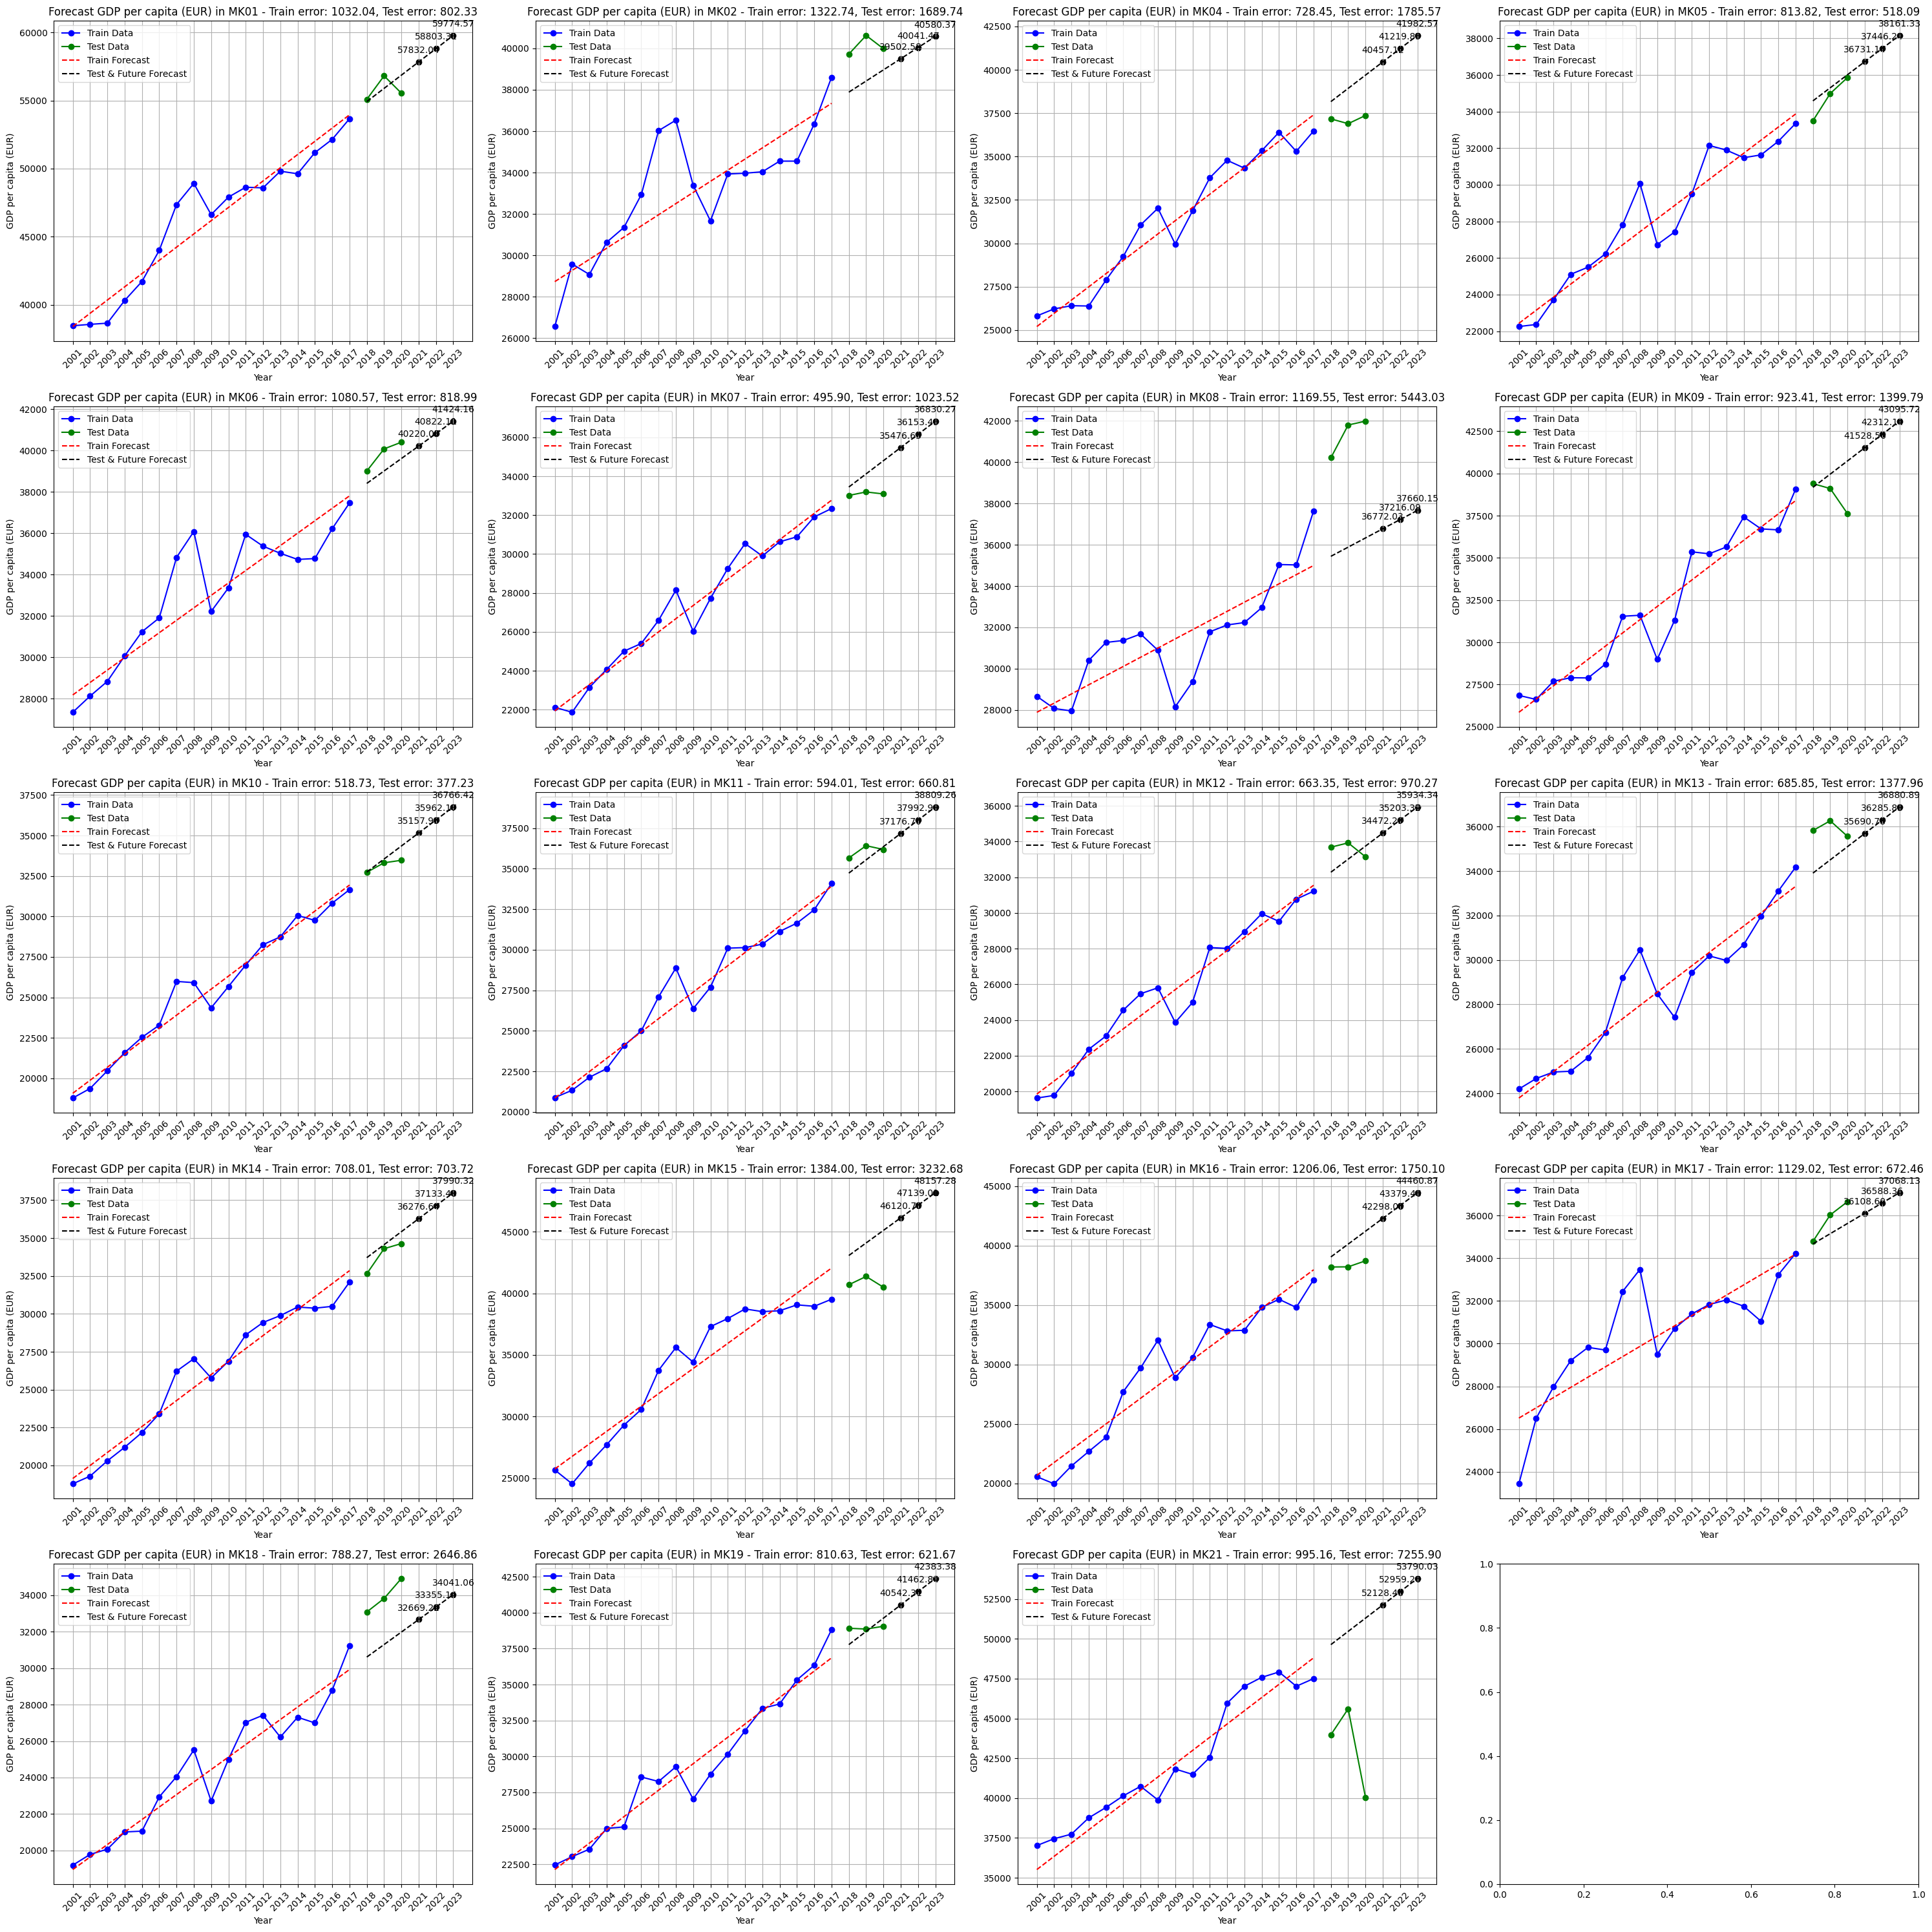

In [46]:
# Forecast + visualize GDP per capita for all regions with Linear Regression
forecast_and_visualize_all_regions(report_gdp_per_capita_region_lm)

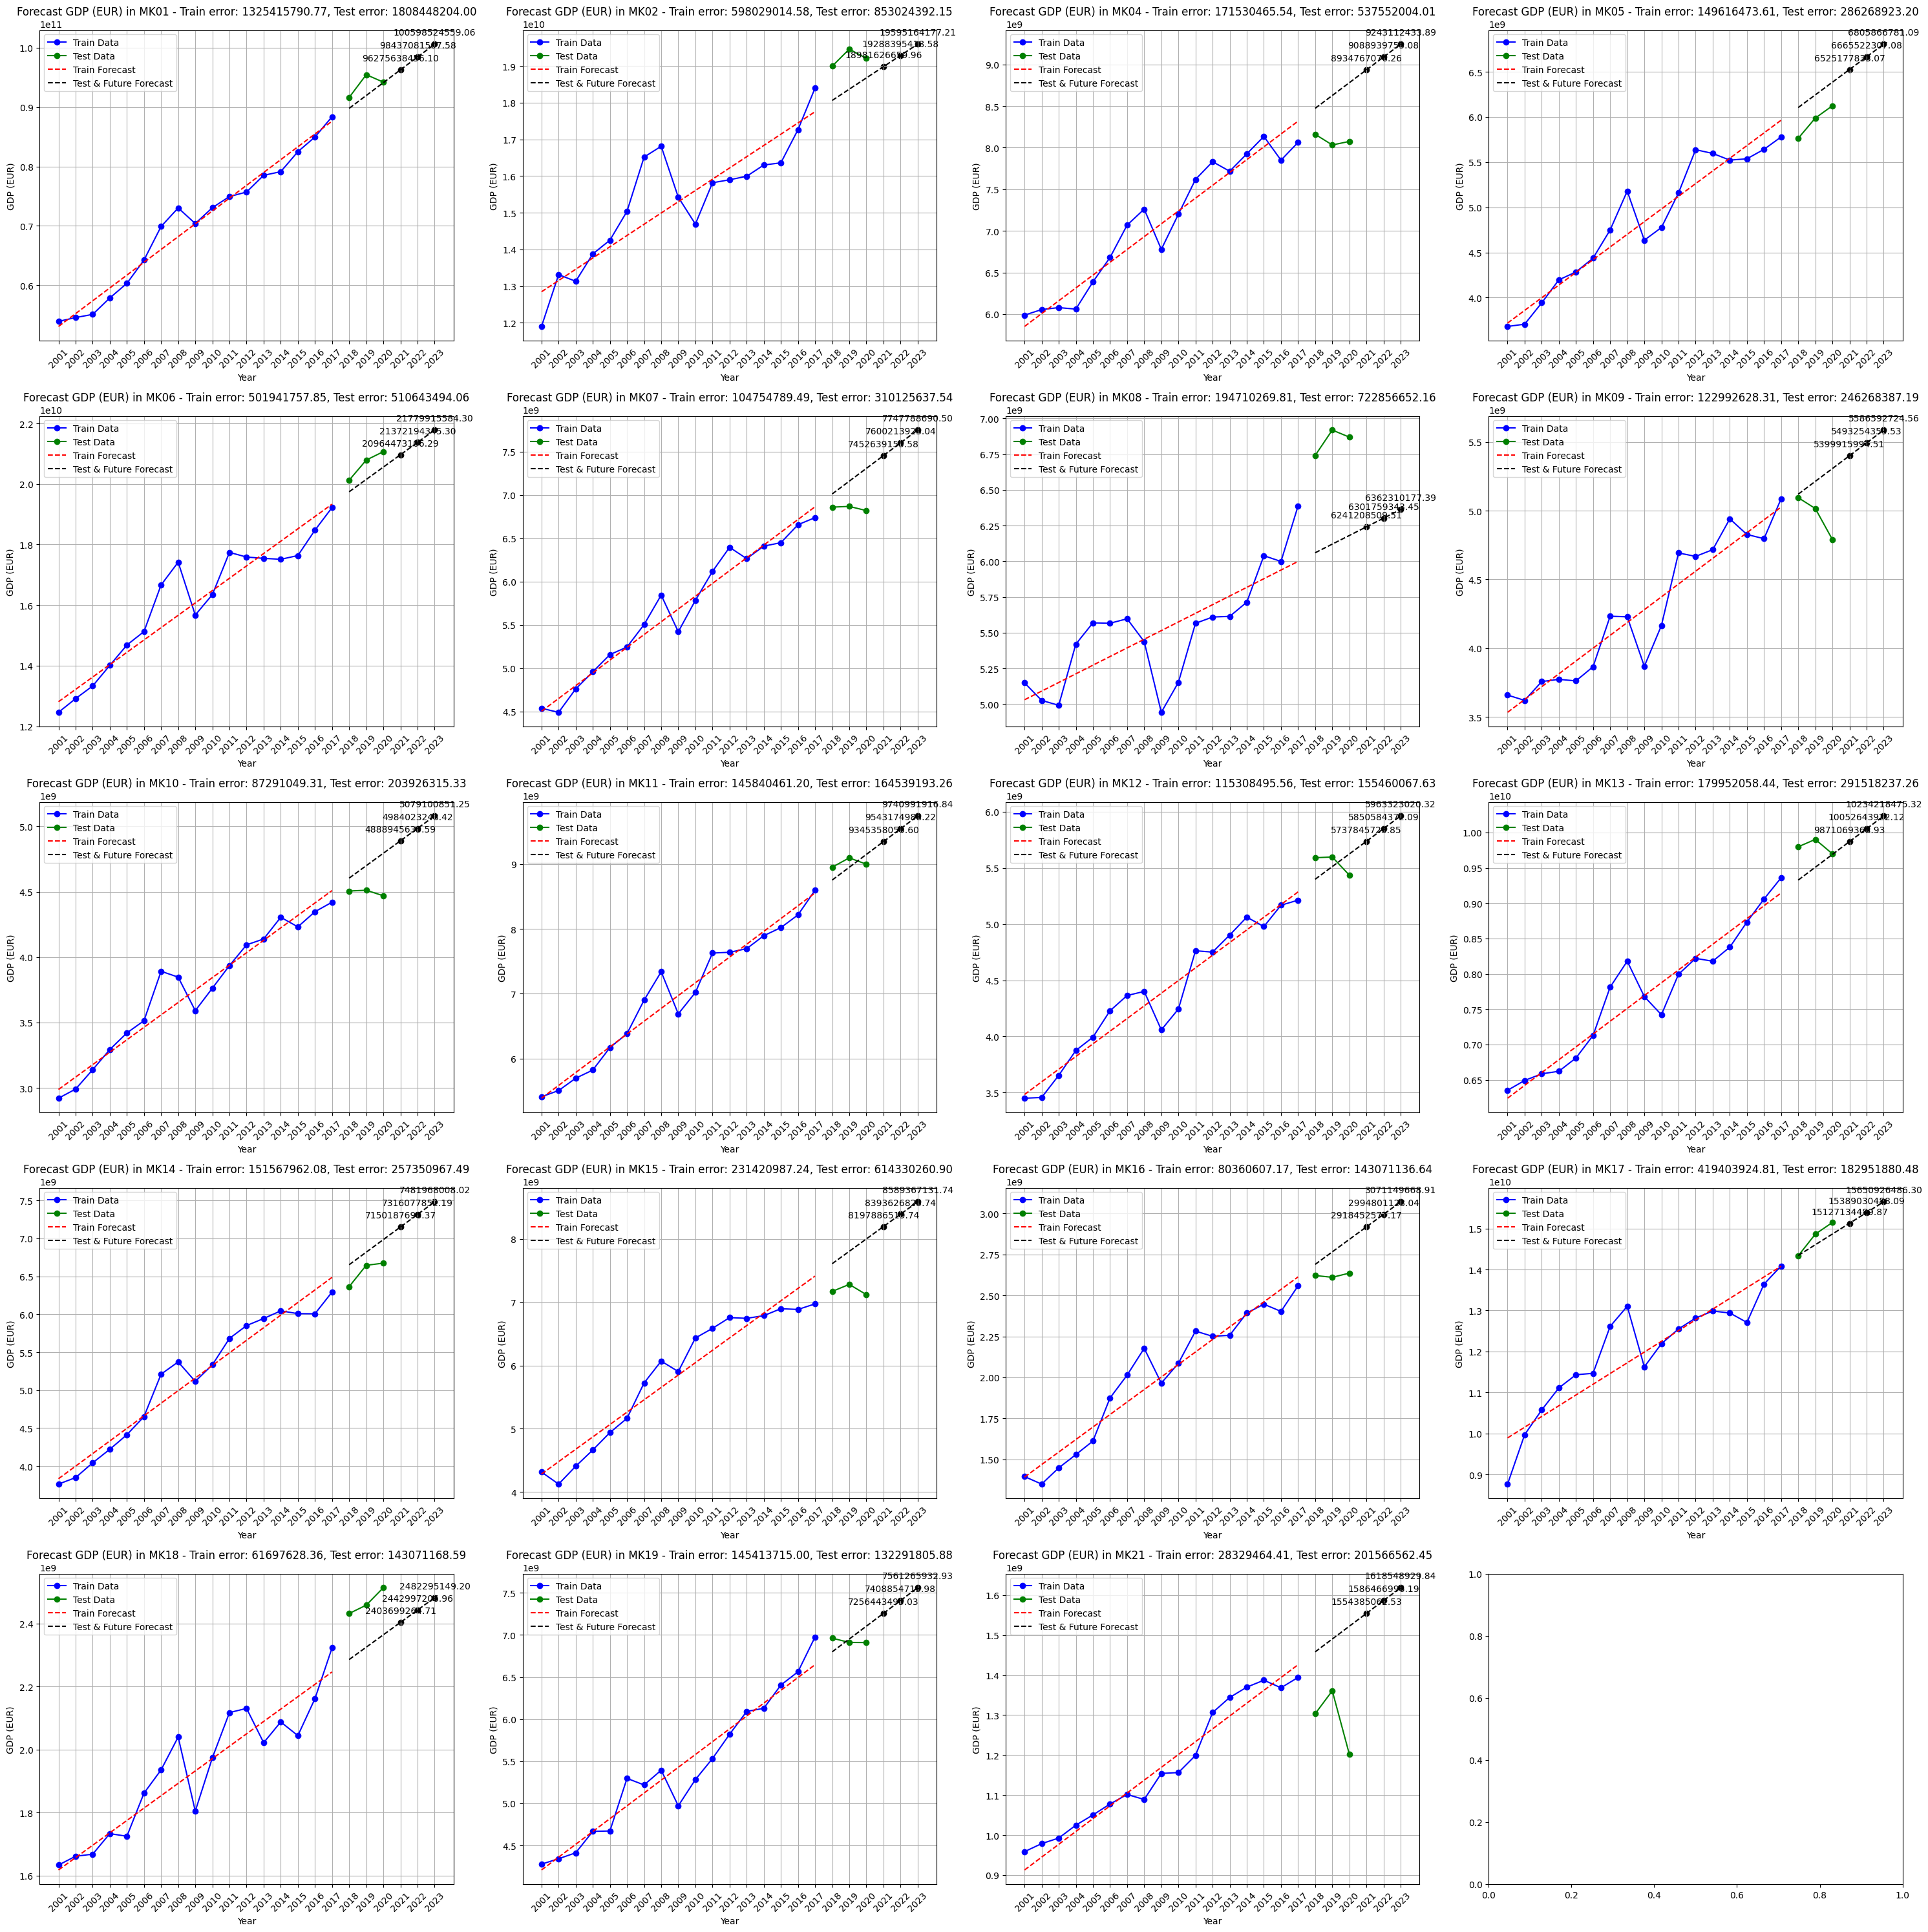

In [47]:
# Forecast + visualize GDP for all regions with Linear Regression
forecast_and_visualize_all_regions(report_gdp_region_lm)

#### Final model ARIMA

In [64]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_future_forecast_df(forecast_df, future_years, region):
    future_forecast_df = forecast_df[forecast_df['Year'].isin(future_years)].copy()
    future_forecast_df = future_forecast_df[['Year', 'Forecast']].copy()
    future_forecast_df.columns = ['Year', region]
    return future_forecast_df


def report_gdp_per_capita_region(region, df, ax, dfs):
    '''Create forecast and visualize GDP per capita of the given region with ARIMA'''

    # Get the region's data
    df_region = get_region_gdp_per_capita(region_code=region, df=df)
    df_region.reset_index(inplace=True)
    df_region['Year'] = df_region['Year'].astype(int)

    # Split the data into a train and test set
    train_size = 0.9
    split_index = int(len(df_region) * train_size)

    train_data = df_region[:split_index]
    test_data = df_region[split_index:]

    # Find the best ARIMA model automatically
    model = auto_arima(train_data['GDP per capita (EUR)'],
                       start_p=0,
                       start_q=0,
                       max_p=5,
                       max_q=5,
                       seasonal=False,
                       stationary=False)

    model.fit(train_data['GDP per capita (EUR)'])

    # Forecast for the training and test data
    train_forecast = model.predict_in_sample()
    test_forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)

    # Calculate the training and testing error (Mean Absolute Error, MAE)
    train_data = train_data[1:].copy()
    train_forecast = train_forecast[1:].copy()
    train_data['Forecast'] = train_forecast
    train_mae = mean_absolute_error(train_data['GDP per capita (EUR)'], train_forecast)
    test_mae = mean_absolute_error(test_data['GDP per capita (EUR)'], test_forecast)

    # Forecast for the next 3 years outside the scope of data
    num_years_to_forecast = 3
    last_year = df_region['Year'].max()
    forecast_years = np.arange(last_year + 1, last_year + num_years_to_forecast + 1)
    forecast_df = pd.concat([test_data, pd.DataFrame({'Year': forecast_years})], ignore_index=True)
    forecast, conf_int = model.predict(n_periods=len(forecast_df), return_conf_int=True)
    forecast.index = range(len(forecast))
    forecast_df['Forecast'] = forecast

    # Save the future forecast of this region into the list of future forecasts for all regions
    future_forecast_df = get_future_forecast_df(forecast_df, forecast_years, region)
    dfs.append(future_forecast_df)

    # Plot the region's data on the subplot
    ax.plot(train_data['Year'], train_data['GDP per capita (EUR)'], label='Train Data', marker='o', markersize=6, color='blue')
    ax.plot(forecast_df['Year'], forecast_df['GDP per capita (EUR)'], label='Test Data', marker='o', markersize=6, color='green')

    # Plot the training and test forecasts
    ax.plot(train_data['Year'], train_data['Forecast'], label='Train Forecast', linestyle='dashed', color='red')
    ax.plot(forecast_df['Year'], forecast_df['Forecast'], label='Test & Future Forecast', linestyle='dashed', color='black')

    # Plot the confidence intervals for the forecasts
    cf = pd.DataFrame(conf_int)
    cf.index = forecast_df['Year']
    ax.fill_between(cf.index, cf[0], cf[1], color='grey', alpha=.3)

    # Set x-ticks for every year
    ax.set_xticks(range(train_data['Year'].min(), forecast_years[-1] + 1))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.set_title(f'Forecast GDP per capita (EUR) in {region} - Train error: {train_mae:.2f}, Test error: {test_mae:.2f}')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP per capita (EUR)')

    # Annotate the test and forecast points
    forecast_years_to_annotate = forecast_df['Year'].iloc[-num_years_to_forecast:]
    forecast_values_to_annotate = forecast[-num_years_to_forecast:]
    for year, value in zip(forecast_years_to_annotate, forecast_values_to_annotate):
        ax.scatter(year, value, marker='o', color='black')
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points", xytext=(0, 10), ha='center', color='black')

    ax.legend(loc='upper left')
    ax.grid(True)


def report_gdp_region(region, df, ax, dfs):
    '''Create forecast and visualize GDP of the given region with ARIMA'''

    # Get the region's data
    df_region = get_region_gdp(region_code=region, df=df)
    df_region.reset_index(inplace=True)
    df_region['Year'] = df_region['Year'].astype(int)

    # Split the data into a train and test set
    train_size = 0.9
    split_index = int(len(df_region) * train_size)

    train_data = df_region[:split_index]
    test_data = df_region[split_index:]

    # Find the best ARIMA model automatically
    model = auto_arima(train_data['GDP (EUR)'],
                       start_p=0,
                       start_q=0,
                       max_p=5,
                       max_q=5,
                       seasonal=False,
                       stationary=False)

    model.fit(train_data['GDP (EUR)'])

    # Forecast for the training and test data
    train_forecast = model.predict_in_sample()
    test_forecast, conf_int = model.predict(n_periods=len(test_data), return_conf_int=True)

    # Calculate the training and testing error (Mean Absolute Error, MAE)
    train_data = train_data[1:].copy()
    train_forecast = train_forecast[1:].copy()
    train_data['Forecast'] = train_forecast
    train_mae = mean_absolute_error(train_data['GDP (EUR)'], train_forecast)
    test_mae = mean_absolute_error(test_data['GDP (EUR)'], test_forecast)

    # Forecast for the next 3 years outside the scope of data
    num_years_to_forecast = 3
    last_year = df_region['Year'].max()
    forecast_years = np.arange(last_year + 1, last_year + num_years_to_forecast + 1)
    forecast_df = pd.concat([test_data, pd.DataFrame({'Year': forecast_years})], ignore_index=True)
    forecast, conf_int = model.predict(n_periods=len(forecast_df), return_conf_int=True)
    forecast.index = range(len(forecast))
    forecast_df['Forecast'] = forecast

    # Save the future forecast of this region into the list of future forecasts for all regions
    future_forecast_df = get_future_forecast_df(forecast_df, forecast_years, region)
    dfs.append(future_forecast_df)

    # Plot the region's data on the subplot
    ax.plot(train_data['Year'], train_data['GDP (EUR)'], label='Train Data', marker='o', markersize=6, color='blue')
    ax.plot(forecast_df['Year'], forecast_df['GDP (EUR)'], label='Test Data', marker='o', markersize=6, color='green')

    # Plot the training and test forecasts
    ax.plot(train_data['Year'], train_data['Forecast'], label='Train Forecast', linestyle='dashed', color='red')
    ax.plot(forecast_df['Year'], forecast_df['Forecast'], label='Test & Future Forecast', linestyle='dashed', color='black')

    # Plot the confidence intervals for the forecasts
    cf = pd.DataFrame(conf_int)
    cf.index = forecast_df['Year']
    ax.fill_between(cf.index, cf[0], cf[1], color='grey', alpha=.3)

    # Set x-ticks for every year
    ax.set_xticks(range(train_data['Year'].min(), forecast_years[-1] + 1))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.set_title(f'Forecast GDP (EUR) in {region} - Train error: {train_mae:.2f}, Test error: {test_mae:.2f}')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP (EUR)')

    # Annotate the test and forecast points
    forecast_years_to_annotate = forecast_df['Year'].iloc[-num_years_to_forecast:]
    forecast_values_to_annotate = forecast[-num_years_to_forecast:]
    for year, value in zip(forecast_years_to_annotate, forecast_values_to_annotate):
        ax.scatter(year, value, marker='o', color='black')
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points", xytext=(0, 10), ha='center', color='black')

    ax.legend(loc='upper left')
    ax.grid(True)


def forecast_and_visualize_all_regions(func):
    '''Create a 5x4 plot of forecasts for each region using the given function'''
    dfs = []
    fig, axes = plt.subplots(5, 4, figsize=(30, 30))
    axes = axes.flatten()
    for i, region in enumerate(DATA['Region code'].unique()):
        func(region, DATA, axes[i], dfs)
    plt.tight_layout()
    plt.show()

    return dfs


def future_forecast_all_regions(dfs):
    '''Create a DataFrame with the future forecasts of all regions'''
    df = pd.DataFrame({'Year': dfs[0]['Year']})
    for region in dfs:
        df = pd.merge(df, region, on='Year', how='inner')
    return df

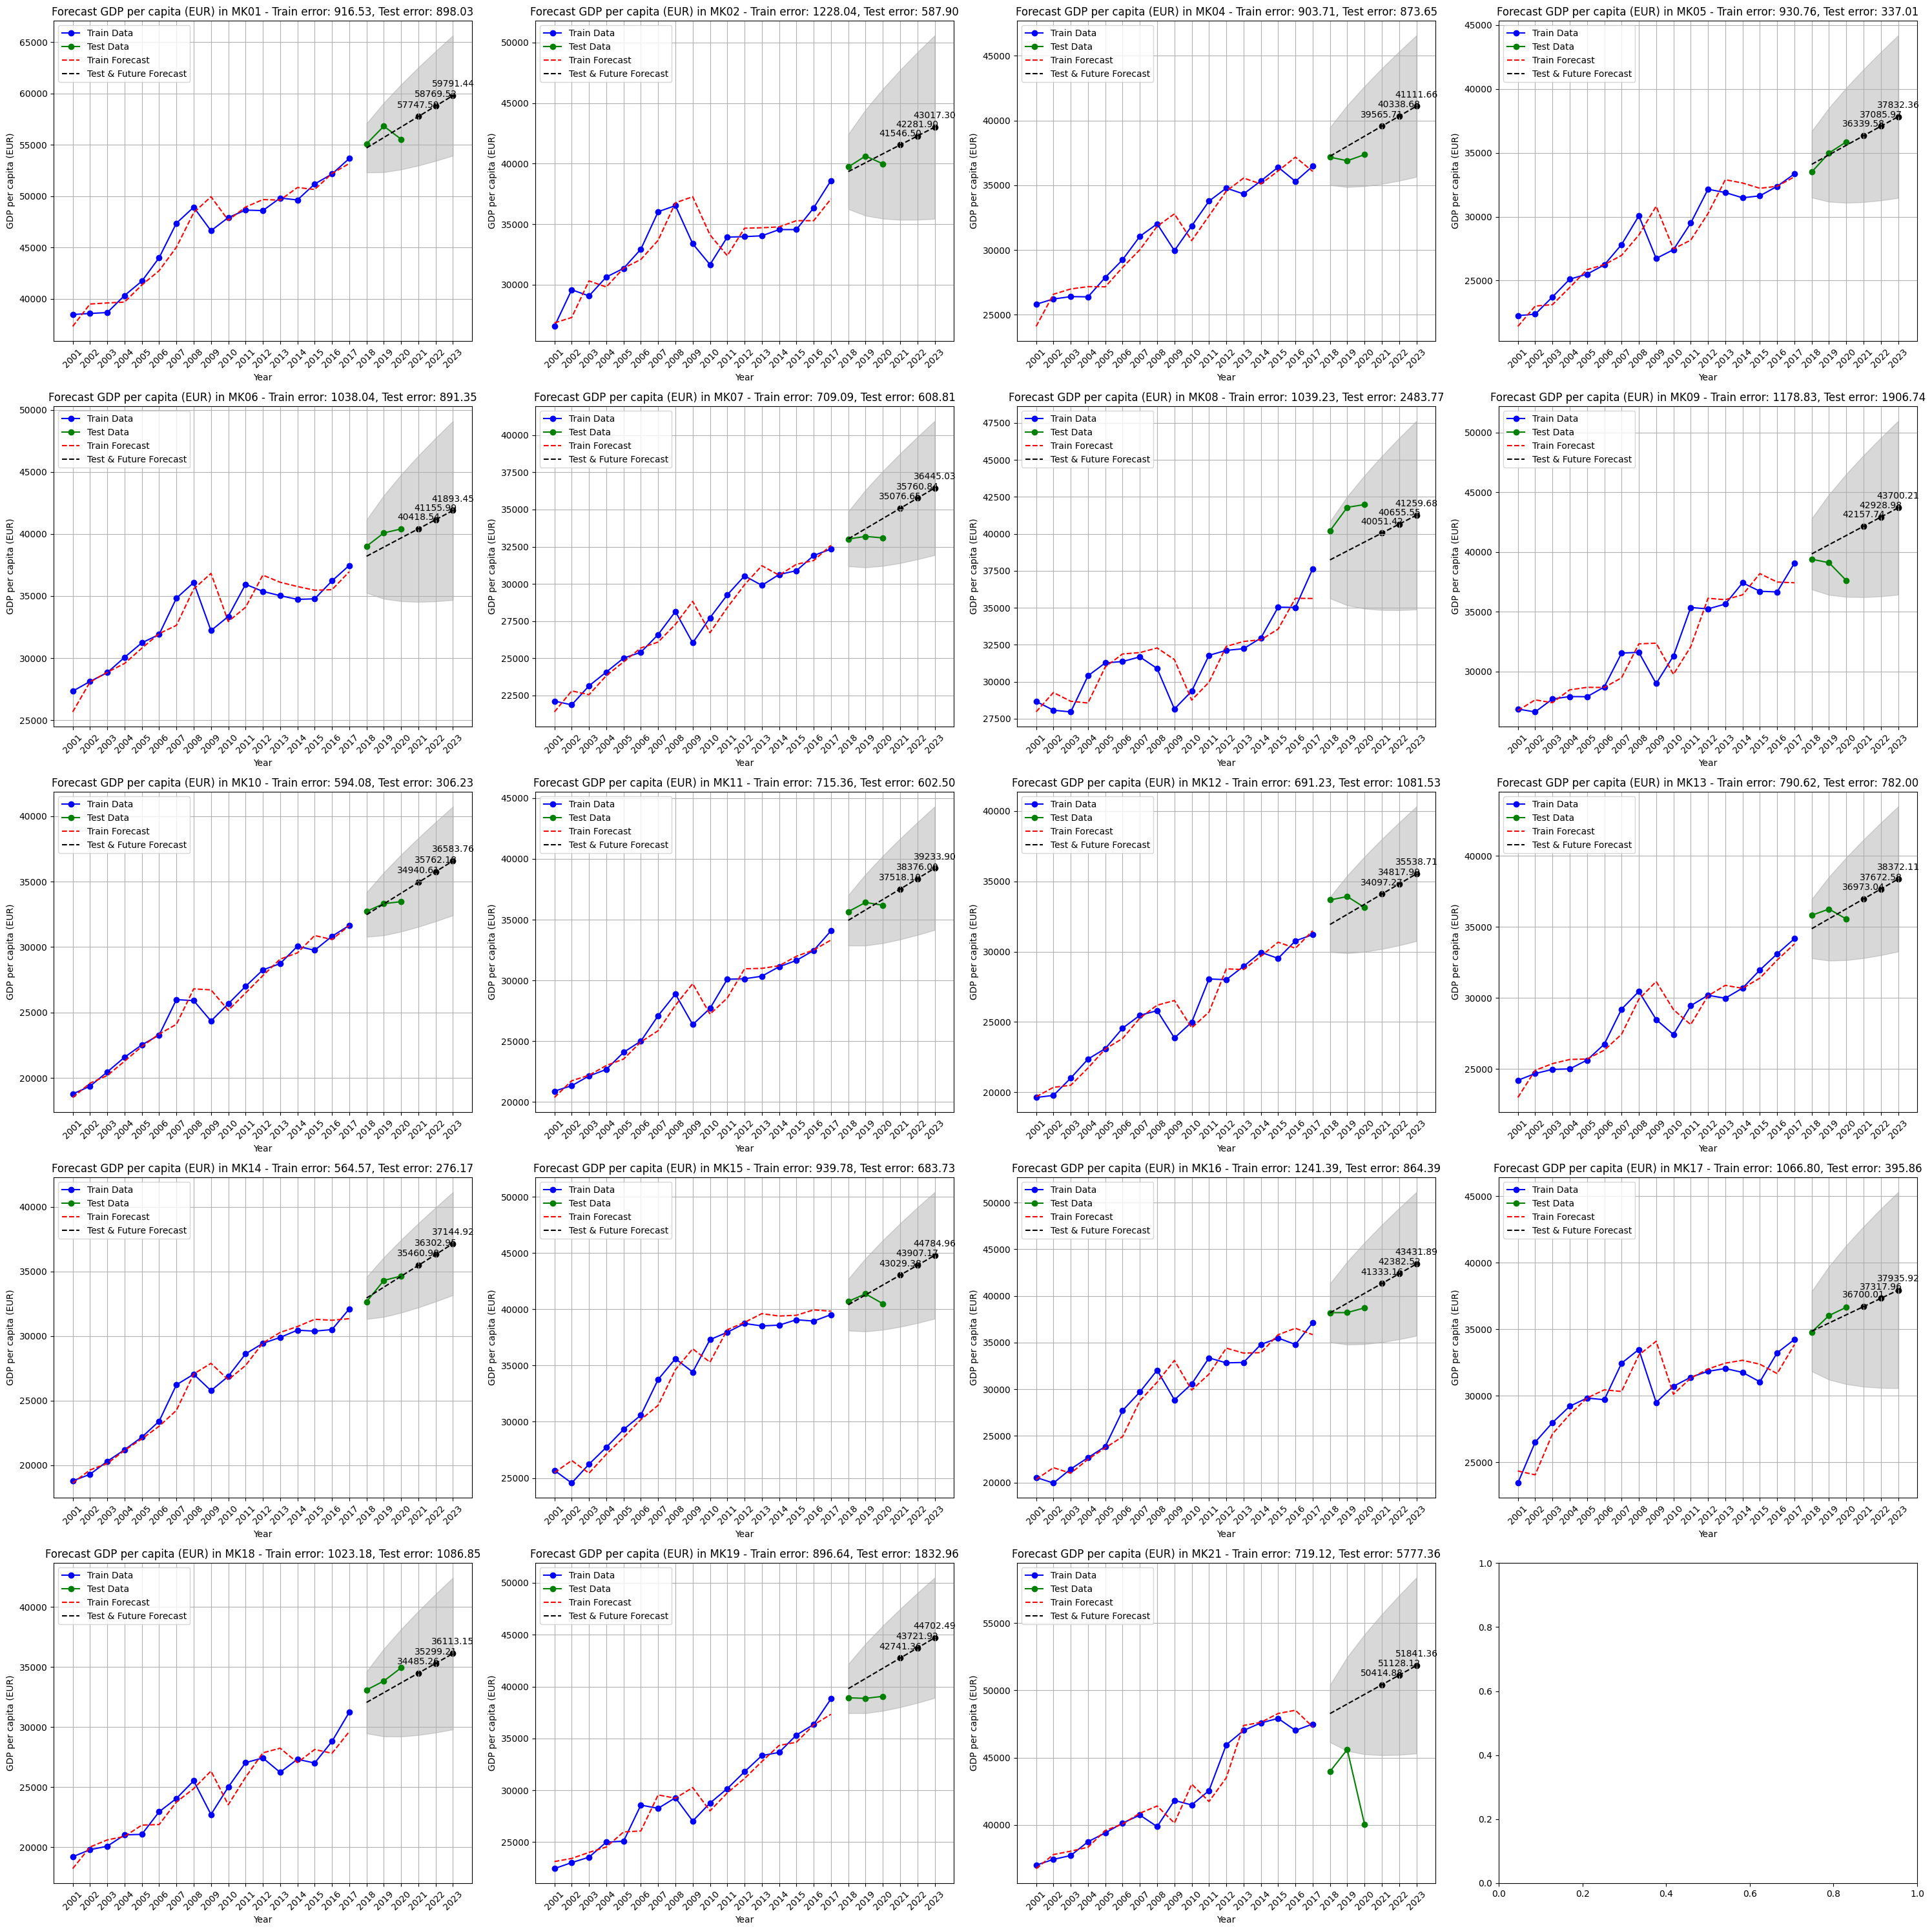

Year          MK01     MK02          MK04          MK05          MK06  \
0  2021  57747.594118  41546.5  39565.705882  36339.576471  40418.535294   
1  2022  58769.517647  42281.9  40338.682353  37085.970588  41155.994118   
2  2023  59791.441176  43017.3  41111.658824  37832.364706  41893.452941   

           MK07          MK08          MK09          MK10     MK11  \
0  35076.652941  40051.417647  42157.741176  34940.605882  37518.1   
1  35760.841176  40655.547059  42928.976471  35762.182353  38376.0   
2  36445.029412  41259.676471  43700.211765  36583.758824  39233.9   

           MK12          MK13          MK14          MK15          MK16  \
0  34097.270588  36973.041176  35460.982353  43029.376471  41333.158824   
1  34817.988235  37672.576471  36302.952941  43907.170588  42382.523529   
2  35538.705882  38372.111765  37144.923529  44784.964706  43431.888235   

           MK17          MK18          MK19          MK21  
0  36700.011765  34485.264706  42741.358824  50414.876760  
1  37317.964706  35299.205882  43721.923529  51128.116729  
2  37935.917647  36113.147059  44702.488235  51841.356698

In [65]:
# Forecast + visualize GDP per capita for all regions with ARIMA
gdp_per_capita_all = forecast_and_visualize_all_regions(report_gdp_per_capita_region)

gdp_per_capita_all = future_forecast_all_regions(gdp_per_capita_all)
gdp_per_capita_all

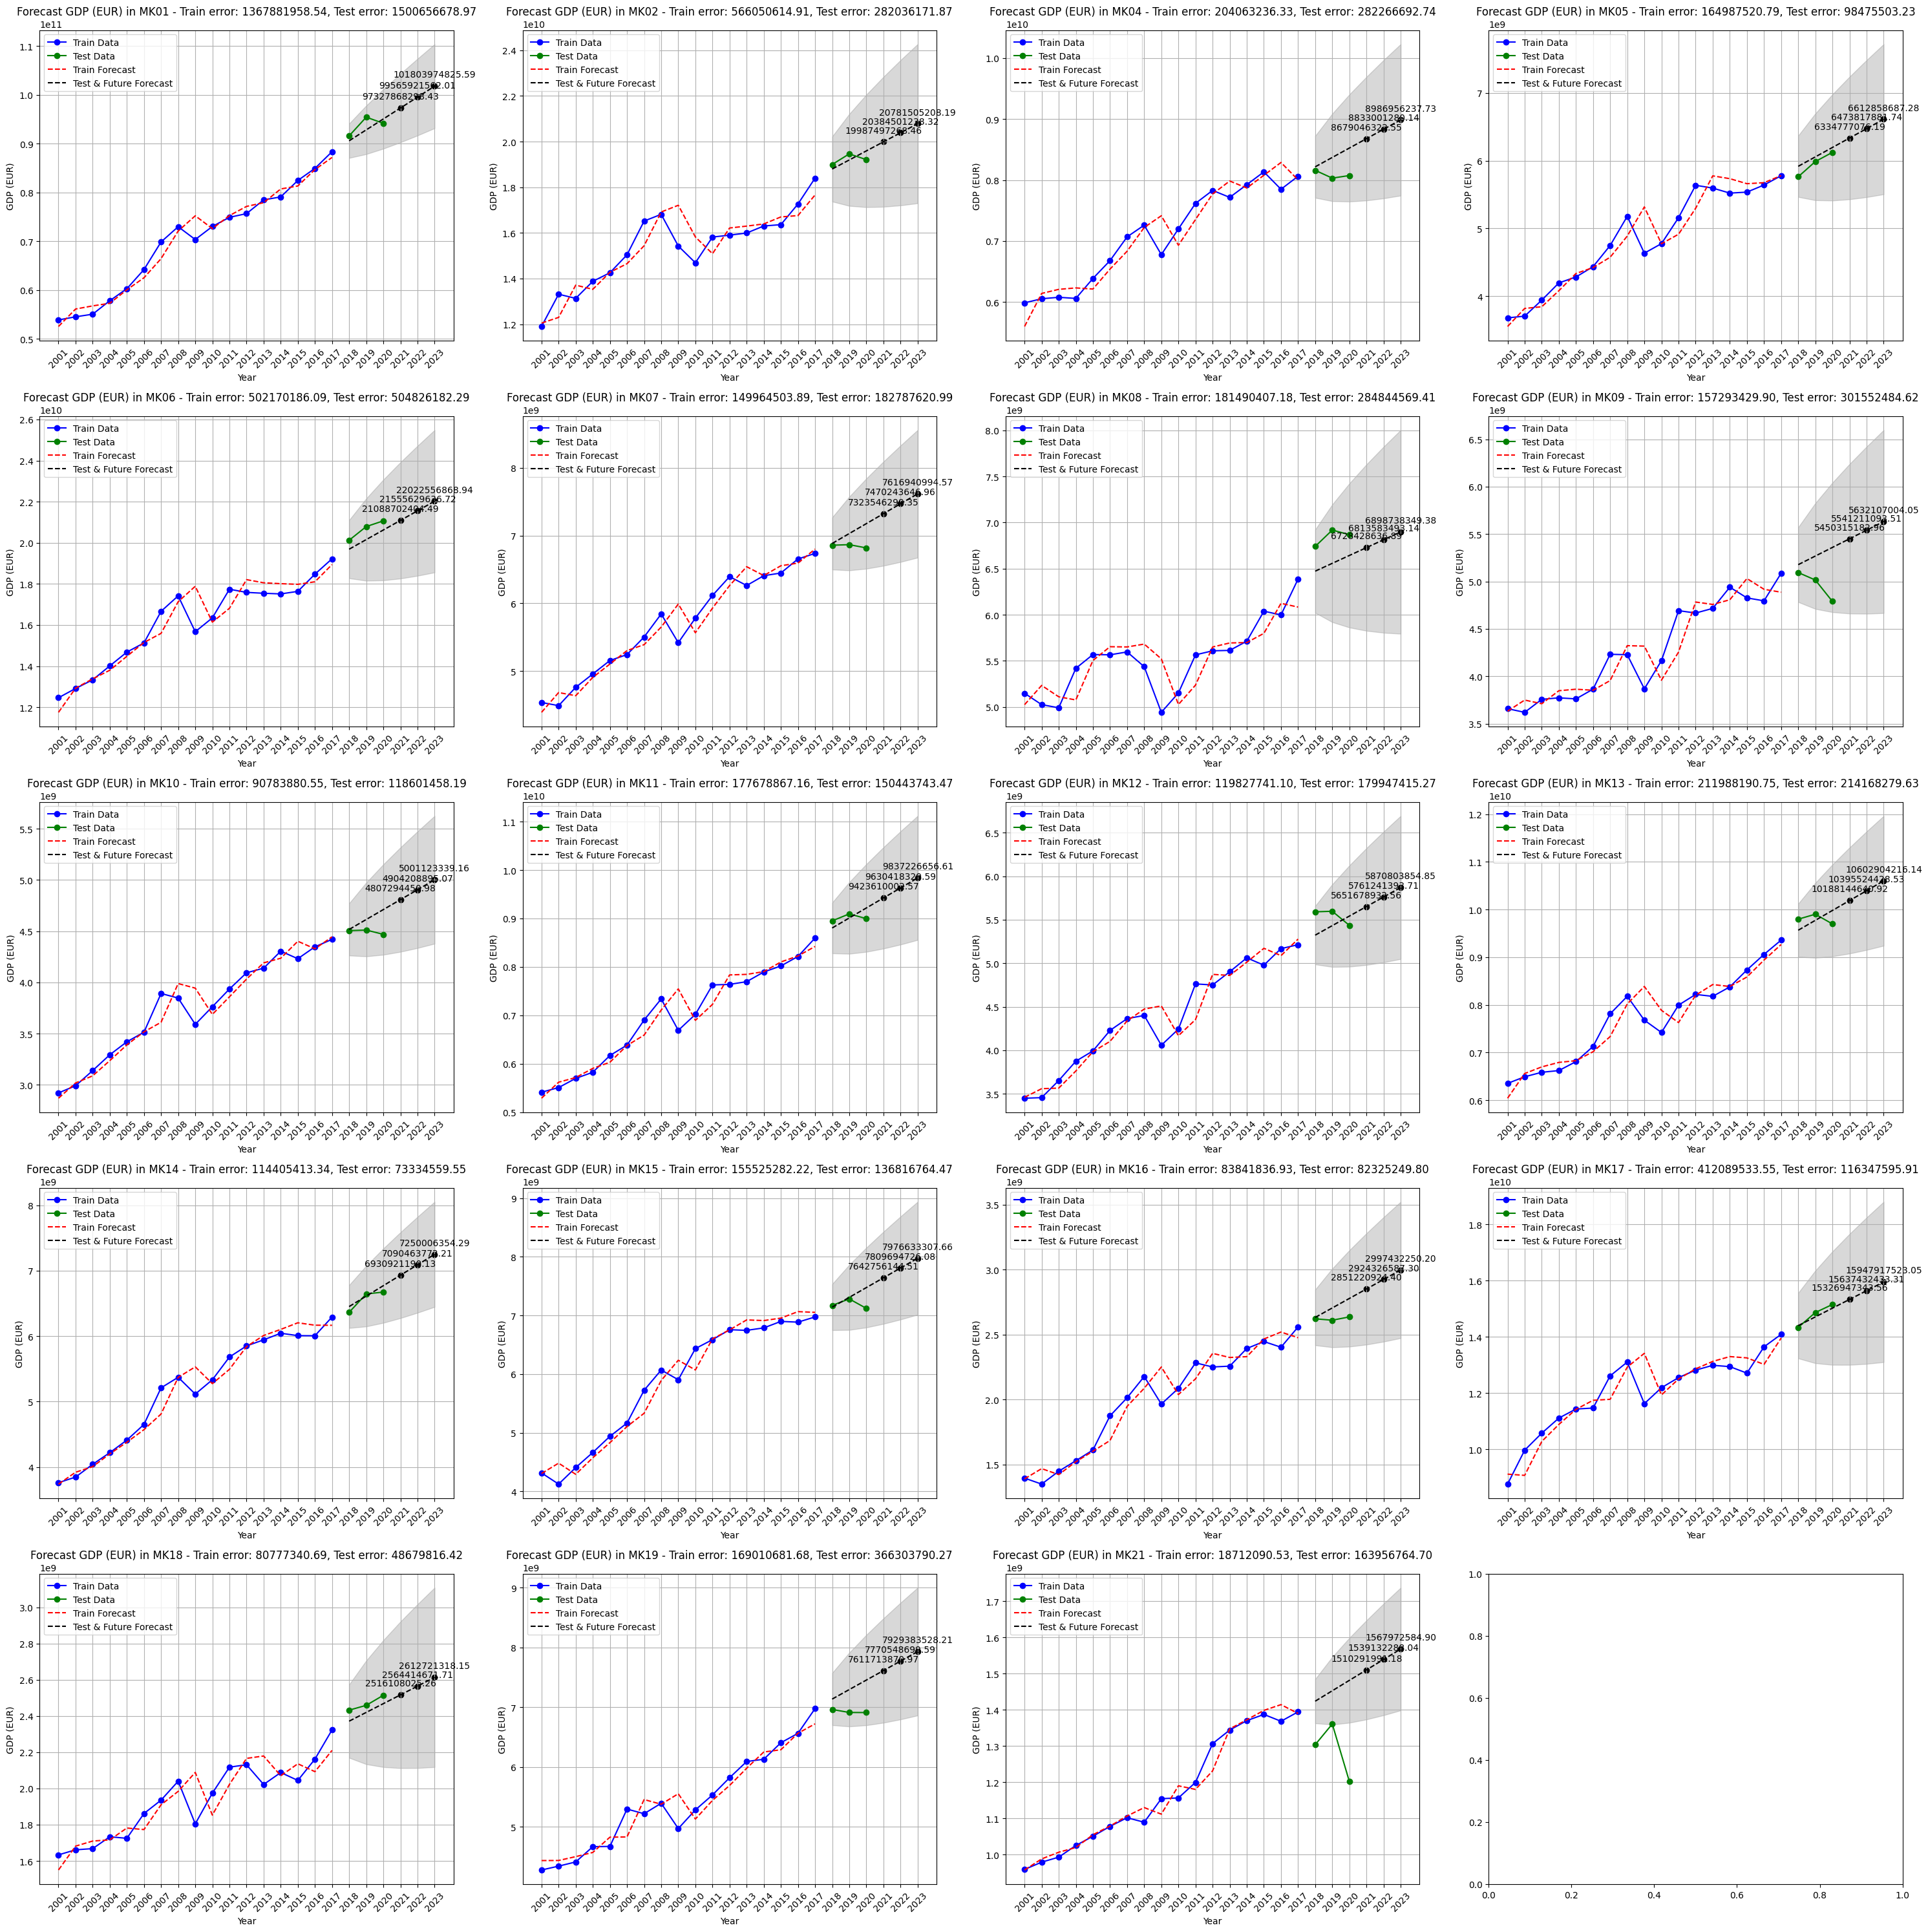

Year          MK01          MK02          MK04          MK05          MK06  \
0  2021  9.732787e+10  1.998750e+10  8.679046e+09  6.334777e+09  2.108870e+10   
1  2022  9.956592e+10  2.038450e+10  8.833001e+09  6.473818e+09  2.155563e+10   
2  2023  1.018040e+11  2.078151e+10  8.986956e+09  6.612859e+09  2.202256e+10   

           MK07          MK08          MK09          MK10          MK11  \
0  7.323546e+09  6.728429e+09  5.450315e+09  4.807294e+09  9.423610e+09   
1  7.470244e+09  6.813583e+09  5.541211e+09  4.904209e+09  9.630418e+09   
2  7.616941e+09  6.898738e+09  5.632107e+09  5.001123e+09  9.837227e+09   

           MK12          MK13          MK14          MK15          MK16  \
0  5.651679e+09  1.018814e+10  6.930921e+09  7.642756e+09  2.851221e+09   
1  5.761241e+09  1.039552e+10  7.090464e+09  7.809695e+09  2.924327e+09   
2  5.870804e+09  1.060290e+10  7.250006e+09  7.976633e+09  2.997432e+09   

           MK17          MK18          MK19          MK21  
0  1.532695e+10  2.516108e+09  7.611714e+09  1.510292e+09  
1  1.563743e+10  2.564415e+09  7.770549e+09  1.539132e+09  
2  1.594792e+10  2.612721e+09  7.929384e+09  1.567973e+09

In [66]:
# Forecast + visualize GDP for all regions with ARIMA
gdp_all = forecast_and_visualize_all_regions(report_gdp_region)

gdp_all = future_forecast_all_regions(gdp_all)
gdp_all

In [67]:
gdp_per_capita_all.to_csv('../data/forecast_values/gdp_per_capita.csv', index=False)
gdp_all.to_csv('../data/forecast_values/gdp.csv', index=False)